# Dataset for Scientific Paper

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats
import plotly
import csv
import random
from scipy.stats import ks_2samp
import polars as pl

In [2]:
print("Polars version:", pl.__version__)

Polars version: 1.8.2


In [3]:
print("Numpy version:", np.__version__)

Numpy version: 1.26.4


### Dataset

In [5]:
pl.Config.set_tbl_rows(200)

polars.config.Config

In [6]:
import os
print(os.getcwd())


C:\Users\Samsung\Documents\DOTTORATO\GitHub\NSE_Lombardy


In [7]:
#Uploading the dataset
full_data = pl.read_csv('C:/Users/Samsung/Documents/THESIS/Luca/dataset_utilizzabile.csv')

full_data.head()

shape: (5, 105)
┌──────────┬─────────┬──────────┬────────┬───┬─────────────┬──────┬───────┬──────────────────────┐
│ ASATotal ┆ Ala     ┆ Allele 1 ┆ Arg    ┆ … ┆ BirthMethod ┆ BIS  ┆ Twins ┆ id                   │
│ ---      ┆ ---     ┆ ---      ┆ ---    ┆   ┆ ---         ┆ ---  ┆ ---   ┆ ---                  │
│ f64      ┆ f64     ┆ str      ┆ f64    ┆   ┆ str         ┆ f64  ┆ f64   ┆ i64                  │
╞══════════╪═════════╪══════════╪════════╪═══╪═════════════╪══════╪═══════╪══════════════════════╡
│ 0.212    ┆ 463.711 ┆ null     ┆ 5.211  ┆ … ┆ Naturale    ┆ null ┆ null  ┆ 4216564817612598001  │
│ 0.121    ┆ 372.249 ┆ null     ┆ 45.458 ┆ … ┆ Naturale    ┆ 1.0  ┆ null  ┆ -1256807065201540826 │
│ 0.209    ┆ 815.699 ┆ null     ┆ 28.218 ┆ … ┆ Cesareo     ┆ 0.0  ┆ null  ┆ -7589139220525689339 │
│ 0.236    ┆ 328.315 ┆ null     ┆ 7.004  ┆ … ┆ Naturale    ┆ 0.0  ┆ null  ┆ 6738088326278308435  │
│ 0.304    ┆ 504.553 ┆ null     ┆ 18.826 ┆ … ┆ Naturale    ┆ 0.0  ┆ null  ┆ 7169442979252900518  │
└──────────┴─────────┴──────────┴────────┴───┴─────────────┴──────┴───────┴──────────────────────┘

In [8]:
full_data = full_data.sort('SamTimeCollected')

In [9]:
dis = pl.read_excel('C:/Users/Samsung/Documents/THESIS/Per Gloria.xlsx')

In [11]:
dis = dis.rename({"CODIE NEONATO": "SampleBarcode"})

In [16]:
dis.head()

shape: (5, 3)
┌───────────────┬──────────┬───────────┐
│ SampleBarcode ┆ DIAGNOSI ┆ CATEGORIA │
│ ---           ┆ ---      ┆ ---       │
│ str           ┆ str      ┆ str       │
╞═══════════════╪══════════╪═══════════╡
│ 1600072855    ┆ MTHFR    ┆ AA        │
│ 1600096585    ┆ CBS      ┆ AA        │
│ 19LD032896    ┆ CBS      ┆ AA        │
│ 19LD011001    ┆ CBS      ┆ AA        │
│ 1500121493    ┆ PHE      ┆ AA        │
└───────────────┴──────────┴───────────┘

In [17]:
full_data.shape

(985788, 105)

In [18]:
full_data = full_data.drop(['Allele 1','City', 'Etnicity', 'Sampling', 'AnswerIX', 'SampleQuality' ])

In [19]:
babies_d = full_data.join(dis, on="SampleBarcode", how="left")
babies_d

shape: (985_788, 101)
┌──────────┬─────────┬─────────┬────────┬───┬───────┬──────────────────────┬──────────┬───────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ Twins ┆ id                   ┆ DIAGNOSI ┆ CATEGORIA │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---   ┆ ---                  ┆ ---      ┆ ---       │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ f64   ┆ i64                  ┆ str      ┆ str       │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════╪══════════════════════╪══════════╪═══════════╡
│ null     ┆ 230.42  ┆ 12.66   ┆ 13.8   ┆ … ┆ 0.0   ┆ 798669216849525467   ┆ null     ┆ null      │
│ null     ┆ 228.77  ┆ 11.44   ┆ 7.49   ┆ … ┆ 0.0   ┆ -3045315683506551317 ┆ null     ┆ null      │
│ null     ┆ 248.25  ┆ 10.12   ┆ 13.88  ┆ … ┆ null  ┆ 5655596528266926376  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8999108248963732586  ┆ null     ┆ null      │
│ null     ┆ 254.93  ┆ 2.25    ┆ 12.82  ┆ … ┆ 0.0   ┆ -2062742519198422210 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3467001463626499211  ┆ null     ┆ null      │
│ null     ┆ 204.82  ┆ 4.27    ┆ 17.81  ┆ … ┆ 0.0   ┆ 5404533278905550421  ┆ null     ┆ null      │
│ null     ┆ 357.81  ┆ 3.92    ┆ 9.23   ┆ … ┆ 0.0   ┆ -7108849192791561097 ┆ null     ┆ null      │
│ null     ┆ 279.2   ┆ 3.14    ┆ 16.42  ┆ … ┆ 0.0   ┆ -8007399401642400209 ┆ null     ┆ null      │
│ null     ┆ 334.23  ┆ 2.55    ┆ 12.12  ┆ … ┆ 0.0   ┆ 8291753707470943964  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4828165840669196153  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6524671024842925972  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 7290003871902494665  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8334662152239453935  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2701559838426245718  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8973680094473528699 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6389631536696753457 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3269271657721219149  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8760416503613157783 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 17935725851028301    ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6022695222053105996  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6963249249166698392 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -7591932376444582831 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -2700099820266017892 ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4288897486594250678  ┆ null     ┆ null      │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2928516856927018644  ┆ null     ┆ null      │
│ null     ┆ 323.415 ┆ 9.835   ┆ 15.21  ┆ … ┆ 0.0   ┆ -4924243677909045048 ┆ null     ┆ null      │
│ null     ┆ 273.18  ┆ 21.7    ┆ 21.62  ┆ … ┆ 0.0   ┆ 1466631020906461301  ┆ null     ┆ null      │
│ null     ┆ 204.04  ┆ 10.805  ┆ 15.065 ┆ … ┆ 0.0   ┆ -4051612118816028339 ┆ null     ┆ null      │
│ null     ┆ 193.28  ┆ 15.95   ┆ 25.26  ┆ … ┆ 0.0   ┆ -6224147610971930503 ┆ null     ┆ null      │
│ null     ┆ 265.66  ┆ 43.03   ┆ 28.1   ┆ … ┆ 0.0   ┆ 4178353816737647132  ┆ null     ┆ null      │
│ null     ┆ 198.52  ┆ 8.21    ┆ 11.86  ┆ … ┆ 0.0   ┆ 7448699820135107656  ┆ null     ┆ null      │
│ null     ┆ 280.69  ┆ 10.82   ┆ 14.86  ┆ … ┆ 0.0   ┆ -3194906354733799552 ┆ null     ┆ null      │
│ null     ┆ 145.39  ┆ 6.31    ┆ 12.46  ┆ … ┆ 0.0   ┆ -406482665783441776  ┆ null     ┆ null      │
│ null     ┆ 297.64  ┆ 8.39    ┆ 9.18   ┆ … ┆ 0.0   ┆ -2049124752551798812 ┆ n

In [20]:
babies_d = babies_d.with_columns(replaced=pl.col("DIAGNOSI").replace(None, 'SANO'))
babies_d = babies_d.drop('DIAGNOSI')
babies_d = babies_d.rename({"replaced": "DIAGNOSI"})
babies_d.group_by('DIAGNOSI').len()

shape: (31, 2)
┌────────────┬────────┐
│ DIAGNOSI   ┆ len    │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ BKT        ┆ 1      │
│ MCAD       ┆ 12     │
│ 3MCC       ┆ 3      │
│ SANO       ┆ 985590 │
│ PHE        ┆ 16     │
│ CblC       ┆ 11     │
│ GA2        ┆ 5      │
│ ASA        ┆ 1      │
│ CIT1       ┆ 8      │
│ CBS        ┆ 3      │
│ ARG        ┆ 1      │
│ ARG1       ┆ 1      │
│ IBG        ┆ 3      │
│ SCAD       ┆ 16     │
│ MMA        ┆ 2      │
│ TYR3       ┆ 1      │
│ CPS1       ┆ 1      │
│ CPT2       ┆ 1      │
│ PA         ┆ 2      │
│ HPA        ┆ 56     │
│ IVA        ┆ 3      │
│ CblA       ┆ 1      │
│ CIT 1      ┆ 1      │
│ MTHFR      ┆ 1      │
│ 2MBG       ┆ 2      │
│ PKU        ┆ 29     │
│ CUD        ┆ 3      │
│ TFP EXITUS ┆ 3      │
│ GA1        ┆ 3      │
│ CblD       ┆ 1      │
│ VLCAD      ┆ 7      │
└────────────┴────────┘

In [21]:
babies_d

shape: (985_788, 101)
┌──────────┬─────────┬─────────┬────────┬───┬───────┬──────────────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ Twins ┆ id                   ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---   ┆ ---                  ┆ ---       ┆ ---      │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ f64   ┆ i64                  ┆ str       ┆ str      │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════╪══════════════════════╪═══════════╪══════════╡
│ null     ┆ 230.42  ┆ 12.66   ┆ 13.8   ┆ … ┆ 0.0   ┆ 798669216849525467   ┆ null      ┆ SANO     │
│ null     ┆ 228.77  ┆ 11.44   ┆ 7.49   ┆ … ┆ 0.0   ┆ -3045315683506551317 ┆ null      ┆ SANO     │
│ null     ┆ 248.25  ┆ 10.12   ┆ 13.88  ┆ … ┆ null  ┆ 5655596528266926376  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8999108248963732586  ┆ null      ┆ SANO     │
│ null     ┆ 254.93  ┆ 2.25    ┆ 12.82  ┆ … ┆ 0.0   ┆ -2062742519198422210 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3467001463626499211  ┆ null      ┆ SANO     │
│ null     ┆ 204.82  ┆ 4.27    ┆ 17.81  ┆ … ┆ 0.0   ┆ 5404533278905550421  ┆ null      ┆ SANO     │
│ null     ┆ 357.81  ┆ 3.92    ┆ 9.23   ┆ … ┆ 0.0   ┆ -7108849192791561097 ┆ null      ┆ SANO     │
│ null     ┆ 279.2   ┆ 3.14    ┆ 16.42  ┆ … ┆ 0.0   ┆ -8007399401642400209 ┆ null      ┆ SANO     │
│ null     ┆ 334.23  ┆ 2.55    ┆ 12.12  ┆ … ┆ 0.0   ┆ 8291753707470943964  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4828165840669196153  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6524671024842925972  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 7290003871902494665  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 8334662152239453935  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2701559838426245718  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8973680094473528699 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6389631536696753457 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 3269271657721219149  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -8760416503613157783 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 17935725851028301    ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 6022695222053105996  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -6963249249166698392 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -7591932376444582831 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ -2700099820266017892 ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 4288897486594250678  ┆ null      ┆ SANO     │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.0   ┆ 2928516856927018644  ┆ null      ┆ SANO     │
│ null     ┆ 323.415 ┆ 9.835   ┆ 15.21  ┆ … ┆ 0.0   ┆ -4924243677909045048 ┆ null      ┆ SANO     │
│ null     ┆ 273.18  ┆ 21.7    ┆ 21.62  ┆ … ┆ 0.0   ┆ 1466631020906461301  ┆ null      ┆ SANO     │
│ null     ┆ 204.04  ┆ 10.805  ┆ 15.065 ┆ … ┆ 0.0   ┆ -4051612118816028339 ┆ null      ┆ SANO     │
│ null     ┆ 193.28  ┆ 15.95   ┆ 25.26  ┆ … ┆ 0.0   ┆ -6224147610971930503 ┆ null      ┆ SANO     │
│ null     ┆ 265.66  ┆ 43.03   ┆ 28.1   ┆ … ┆ 0.0   ┆ 4178353816737647132  ┆ null      ┆ SANO     │
│ null     ┆ 198.52  ┆ 8.21    ┆ 11.86  ┆ … ┆ 0.0   ┆ 7448699820135107656  ┆ null      ┆ SANO     │
│ null     ┆ 280.69  ┆ 10.82   ┆ 14.86  ┆ … ┆ 0.0   ┆ -3194906354733799552 ┆ null      ┆ SANO     │
│ null     ┆ 145.39  ┆ 6.31    ┆ 12.46  ┆ … ┆ 0.0   ┆ -406482665783441776  ┆ null      ┆ SANO     │
│ null     ┆ 297.64  ┆ 8.39    ┆ 9.18   ┆ … ┆ 0.0   ┆ -2049124752551798812 ┆ n

In [22]:
babies_d = babies_d.with_columns(pl.col("Weight").cast(pl.Float64))
babies_d = babies_d.with_columns(pl.col("GestationalAge").cast(pl.Float64))
babies_d = babies_d.with_columns(pl.col('IRT-GSP').cast(pl.Float64))

In [23]:
for col in babies_d.columns:
    print('colonna',col,'di tipo', babies_d[col].dtype)

colonna ASATotal di tipo Float64
colonna Ala di tipo Float64
colonna Arg di tipo Float64
colonna Cit di tipo Float64
colonna Glu di tipo Float64
colonna Gly di tipo Float64
colonna Leu\Ile\Pro-OH di tipo Float64
colonna Orn di tipo Float64
colonna MET di tipo Float64
colonna PHE di tipo Float64
colonna TYR di tipo Float64
colonna HCYS di tipo Float64
colonna Pro di tipo Float64
colonna Val di tipo Float64
colonna BTD di tipo Float64
colonna C0 di tipo Float64
colonna C3 di tipo Float64
colonna C4OH\C3DC di tipo Float64
colonna C4 di tipo Float64
colonna C5OH\C4DC di tipo Float64
colonna C5 di tipo Float64
colonna C5:1 di tipo Float64
colonna C5DC\C6OH di tipo Float64
colonna C6 di tipo Float64
colonna C6DC di tipo Float64
colonna C8 di tipo Float64
colonna C8:1 di tipo Float64
colonna C10 di tipo Float64
colonna C10:1 di tipo Float64
colonna C10:2 di tipo Float64
colonna C12 di tipo Float64
colonna C12:1 di tipo Float64
colonna C14 di tipo Float64
colonna C14:1 di tipo Float64
colonna 

In [24]:
babies_d = babies_d.with_columns(babies_d["CortisoneMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Meconium"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["TyroidMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BIS"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BabyFed"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Twins"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["CortisoneBaby"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsBaby"].fill_null("0"))

In [25]:
babies_d = babies_d.with_columns([pl.col("CortisoneMother").cast(pl.Float64).cast(pl.Int64),
    pl.col("AntibioticsMother").cast(pl.Float64).cast(pl.Int64),
    pl.col("Meconium").cast(pl.Float64).cast(pl.Int64),
    pl.col("TyroidMother").cast(pl.Float64).cast(pl.Int64), 
    pl.col("BIS").cast(pl.Float64).cast(pl.Int64), 
    pl.col("BabyFed").cast(pl.Float64).cast(pl.Int64),
    pl.col("Twins").cast(pl.Float64).cast(pl.Int64),
    pl.col("CortisoneBaby").cast(pl.Float64).cast(pl.Int64),
    pl.col("AntibioticsBaby").cast(pl.Float64).cast(pl.Int64),
])

In [26]:
babies_d = babies_d.with_columns(pl.when(pl.col('GestationalAge') < 37).then(1).otherwise(0).alias('Premature'))

In [27]:
babies_d = babies_d.with_columns(pl.col("DateOfBirth").str.to_date("%Y-%m-%d"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.replace("T00:00:00.000000", "").alias("SamTimeCollected"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.to_date("%Y-%m-%d"))

In [28]:
babies_d = babies_d.rename({"SamTimeCollected": "SamDateCollected"})

In [29]:
babies_d['SamTimeReceived'].unique()

shape: (12_224,)
Series: 'SamTimeReceived' [str]
[
	"2018-08-14 15:24:31.617"
	"2019-12-16 15:17:06.040"
	"2015-11-17 00:00:00.000"
	"2019-11-04 11:06:39.853"
	"2020-07-24 12:06:36.653"
	"2020-12-02 15:23:50.607"
	"2021-05-31 14:59:41.557"
	"2019-10-25 15:10:12.703"
	"2015-12-10"
	"2013-02-21"
	"2018-01-30 15:02:25.213"
	"2021-02-17 10:31:03.770"
	"2021-01-18 12:05:37.123"
	"2019-02-20 15:35:53.207"
	"2021-03-29 11:32:56.687"
	"2019-10-14 14:56:45.707"
	"2014-01-23"
	"2020-10-09 13:06:03.327"
	"2017-01-18 12:41:40.780"
	"2019-08-14 14:14:41.517"
	"2017-11-03 12:41:40.530"
	"2020-08-24 11:55:46.040"
	"2019-12-16 14:15:22.490"
	"2020-11-03 15:07:19.497"
	"2020-07-08 14:49:23.027"
	"2015-07-09"
	"2019-06-19 11:53:29.173"
	"2018-11-23 14:14:43.900"
	"2012-05-14"
	"2018-12-03 15:37:42.103"
	"2019-06-03 13:32:27.343"
	"2013-10-08"
	"2018-05-04 11:40:42.400"
	"2020-05-18 11:09:48.197"
	"2018-07-05 15:04:39.420"
	"2018-07-18 12:23:36.723"
	"2019-11-06 14:53:48.187"
	"2018-08-10 12:58:52.070"
	"2018-04-26 13:53:39.467"
	"2020-10-12 11:23:13.363"
	"2018-06-21 14:32:40.803"
	"2020-10-19 13:11:24.423"
	"2017-04-10 14:22:50.373"
	"2020-10-12 13:00:23.900"
	"2021-09-14 16:22:00.200"
	"2019-03-07 12:58:24.337"
	"2021-09-23 14:58:19.743"
	"2017-08-11 11:47:07.187"
	"2016-11-02"
	"2020-02-10 12:45:14.673"
	"2019-04-02 12:25:48.560"
	"2019-12-04 11:37:35.060"
	"2020-09-21 12:38:37.017"
	"2018-06-01 15:22:24.730"
	"2019-04-23 12:05:34.793"
	"2015-09-15"
	"2019-07-30 15:22:04.587"
	"2017-05-24 09:41:50.603"
	"2018-05-09 11:41:48.227"
	"2020-10-08 11:55:08.777"
	"2020-09-23 15:26:06.840"
	"2016-10-06"
	"2018-11-19 15:08:13.013"
	"2018-01-26 12:46:39.867"
	"2018-12-27 15:51:25.777"
	"2019-09-06 13:05:47.073"
	"2021-06-21 15:00:56.937"
	"2019-02-06 13:55:56.063"
	"2021-01-26 12:08:28.587"
	"2015-12-29"
	"2017-05-09 11:19:59.040"
	"2018-05-02 12:17:27.060"
	"2017-08-24 12:03:07.297"
	"2018-12-03 15:07:28.313"
	"2018-10-15 11:46:25.343"
	"2017-11-10 11:35:44.040"
	"2021-12-23 14:33:33.873"
	"2020-05-07 15:24:51.390"
	"2021-03-08 14:55:37.503"
	"2019-05-06 13:32:56.700"
	"2019-01-08 14:48:42.923"
	"2013-10-01"
	"2018-06-27 12:28:00.780"
	"2019-06-11 13:44:16.483"
	"2018-10-22 13:47:43.097"
	"2018-07-30 13:23:15.977"
	"2019-07-17 15:11:41.300"
	"2017-07-18 12:09:59.000"
	"2019-05-07 12:14:26.307"
	"2021-01-14 13:12:59.690"
	"2021-04-06 11:21:05.447"
	"2019-06-10 12:48:11.027"
	"2020-03-06 15:00:19.987"
	"2021-11-24 15:09:26.777"
	"2018-09-04 13:50:23.427"
	"2018-06-18 11:48:52.017"
	"2017-08-21 15:12:26.557"
	"2019-08-07 15:53:31.250"
	"2017-05-10 11:54:34.407"
	"2020-04-07 14:34:20.933"
	…
	"2019-02-01 13:40:51.030"
	"2018-08-06 14:05:32.963"
	"2015-04-24"
	"2014-11-18"
	"2018-04-06 15:20:20.897"
	"2015-01-21"
	"2019-11-04 13:44:33.617"
	"2019-12-18 12:15:19.023"
	"2014-02-27"
	"2018-01-29 12:09:03.677"
	"2018-03-23 10:53:34.953"
	"2017-10-04 15:33:50.753"
	"2018-12-19 12:35:03.440"
	"2015-04-28"
	"2018-09-17 15:07:49.040"
	"2013-07-10"
	"2021-02-04 09:13:09.730"
	"2017-02-08 11:08:31.477"
	"2013-08-08"
	"2012-08-16"
	"2020-10-05 13:09:57.077"
	"2018-03-23 15:15:26.220"
	"2017-09-28 11:32:32.667"
	"2019-01-16 15:39:26.873"
	"2020-03-18 12:12:47.087"
	"2019-07-26 15:22:03.480"
	"2012-05-25"
	"2016-05-23"
	"2019-07-22 13:44:38.147"
	"2021-01-25 14:55:54.913"
	"2017-10-19 15:03:06.850"
	"2017-07-31 15:16:55.860"
	"2021-03-05 12:07:39.137"
	"2018-11-09 11:48:02.837"
	"2021-02-09 12:01:05.480"
	"2019-09-23 15:13:57.420"
	"2019-03-25 11:43:51.097"
	"2019-05-23 11:53:39.760"
	"2018-05-21 13:21:59.687"
	"2018-05-16 14:37:12.747"
	"2020-11-04 12:41:41.550"
	"2019-08-12 13:28:01.037"
	"2019-12-10 16:05:52.660"
	"2020-05-04 11:18:18.413"
	"2021-02-22 12:49:32.607"
	"2020-03-13 15:18:50.407"
	"2012-08-24"
	"2019-11-11 14:42:45.837"
	"2021-12-29 14:58:56.690"
	"2018-02-14 14:17:37.327"
	"2017-08-17 14:55:21.817"
	"2018-08-07 14:53:33.483"
	"2018-10-22 15:52:41.673"
	"2020-12-09 13:54:18.027"
	"2020-06-03 12:57:11.240"
	"2019-10-24 12:14:50.660"
	"2021-11-22 12:10:4

In [31]:
babies_d = babies_d.with_columns(
    pl.col("SamTimeReceived")
    .str.strptime(pl.Datetime, format= None, strict=True)  # Gestione flessibile di datetime
    .cast(pl.Date)  # Estrarre solo la data
)


In [32]:
babies_d = babies_d.rename({"SamTimeReceived": "SamDateReceived"})

- Do premature samples have always BIS sample?

The answer is no 

#### GestationalAge
- Are TooYoung all with less than 37 week of gestationalage?

In [42]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') < 37))

shape: (122_485, 101)
┌──────────┬────────────┬─────────┬─────────┬───┬───────┬───────────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala        ┆ Arg     ┆ Cit     ┆ … ┆ Twins ┆ id                ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ ---        ┆ ---     ┆ ---     ┆   ┆ ---   ┆ ---               ┆ ---       ┆ ---      │
│ f64      ┆ f64        ┆ f64     ┆ f64     ┆   ┆ i64   ┆ i64               ┆ str       ┆ str      │
╞══════════╪════════════╪═════════╪═════════╪═══╪═══════╪═══════════════════╪═══════════╪══════════╡
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 34670014636264992 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 11                ┆           ┆          │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 65246710248429259 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 72                ┆           ┆          │
│ null     ┆ 193.28     ┆ 15.95   ┆ 25.26   ┆ … ┆ 0     ┆ -6224147610971930 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 503               ┆           ┆          │
│ null     ┆ 164.51     ┆ 9.14    ┆ 7.47    ┆ … ┆ 0     ┆ -8087676631629921 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 686               ┆           ┆          │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ -8027301619196848 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 643               ┆           ┆          │
│ null     ┆ 480.64     ┆ 58.35   ┆ 23.81   ┆ … ┆ 0     ┆ -7148762691522595 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 745               ┆           ┆          │
│ null     ┆ 226.4      ┆ 44.95   ┆ 25.76   ┆ … ┆ 0     ┆ 25947020194883810 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 36                ┆           ┆          │
│ null     ┆ 224.83     ┆ 7.12    ┆ 9.6     ┆ … ┆ 0     ┆ -5313653079522532 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 15                ┆           ┆          │
│ null     ┆ 655.09     ┆ 27.68   ┆ 9.57    ┆ … ┆ 0     ┆ -3979712806580280 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 294               ┆           ┆          │
│ null     ┆ 193.46     ┆ 7.14    ┆ 10.55   ┆ … ┆ 1     ┆ 14573002249572481 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 18                ┆           ┆          │
│ null     ┆ 314.25322  ┆ 26.93   ┆ 12.51   ┆ … ┆ 1     ┆ 22984843655374659 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 13                ┆           ┆          │
│ null     ┆ 323.12     ┆ 13.91   ┆ 28.49   ┆ … ┆ 0     ┆ -3977697317442396 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 414               ┆           ┆          │
│ null     ┆ 246.34     ┆ 17.72   ┆ 19.09   ┆ … ┆ 0     ┆ -7954205922551453 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 565               ┆           ┆          │
│ null     ┆ 371.97     ┆ 14.93   ┆ 5.8     ┆ … ┆ 0     ┆ -4263061784894784 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 903               ┆           ┆          │
│ null     ┆ 279297.035 ┆ 59.07   ┆ 23.29   ┆ … ┆ 0     ┆ -7446081674026185 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 12                ┆           ┆          │
│ null     ┆ 252.74     ┆ 11.82   ┆ 10.47   ┆ … ┆ 0     ┆ -2483121181206695 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 066               ┆           ┆          │
│ null     ┆ 257.06     ┆ 16.38   ┆ 14.36   ┆ … ┆ 0     ┆ 75627782772927204 ┆ null      ┆ SANO     │
│          ┆            ┆         ┆         ┆   ┆       ┆ 35                ┆           ┆          │
│ null     ┆ 124.4      ┆ 1.9     ┆ 6.6

In [43]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') > 37))


shape: (0, 101)
┌──────────┬─────┬─────┬─────┬───┬───────┬─────┬───────────┬──────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ Twins ┆ id  ┆ CATEGORIA ┆ DIAGNOSI │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---   ┆ --- ┆ ---       ┆ ---      │
│ f64      ┆ f64 ┆ f64 ┆ f64 ┆   ┆ i64   ┆ i64 ┆ str       ┆ str      │
╞══════════╪═════╪═════╪═════╪═══╪═══════╪═════╪═══════════╪══════════╡
└──────────┴─────┴─────┴─────┴───┴───────┴─────┴───────────┴──────────┘

ok, this is correct

### Numerical Features

In [54]:
colonne_numeriche = []
cat = ['AntibioticsBaby', 'Hospital','Meconium','CortisoneBaby','AntibioticsMother', 'CortisoneMother','TyroidMother','TPNMCTFeed', 'Premature','TooYoung', 'Sex', 'AnswerIX', 'HUFeed', 'MIXFeed','ARTFeed','TPNFeed','ENFeed','TPNCARNFeed','BIS','BabyFed', 'Twins','TPNMCTFeed']
ciclo = list(filter(lambda x: x not in cat, babies_d.columns))
for col in ciclo:
    if babies_d[col].dtype == pl.Float64:
        colonne_numeriche.append(col)

In [58]:
lista_id = babies_d.filter(pl.col('DIAGNOSI') != 'SANO')['id'].to_list()
malati = babies_d.filter(pl.col('DIAGNOSI') != 'SANO')

In [59]:
babies = babies_d.unique(subset="id", keep="first")

In [61]:
babies['DIAGNOSI'].value_counts()

shape: (31, 2)
┌────────────┬────────┐
│ DIAGNOSI   ┆ count  │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ ARG        ┆ 1      │
│ PHE        ┆ 15     │
│ SANO       ┆ 791559 │
│ PKU        ┆ 28     │
│ CIT1       ┆ 8      │
│ MCAD       ┆ 12     │
│ CblD       ┆ 1      │
│ ASA        ┆ 1      │
│ CUD        ┆ 3      │
│ CblA       ┆ 1      │
│ 2MBG       ┆ 2      │
│ CBS        ┆ 3      │
│ GA1        ┆ 3      │
│ CblC       ┆ 11     │
│ CIT 1      ┆ 1      │
│ IVA        ┆ 3      │
│ MTHFR      ┆ 1      │
│ 3MCC       ┆ 3      │
│ VLCAD      ┆ 7      │
│ GA2        ┆ 5      │
│ CPT2       ┆ 1      │
│ ARG1       ┆ 1      │
│ HPA        ┆ 54     │
│ MMA        ┆ 2      │
│ PA         ┆ 1      │
│ SCAD       ┆ 16     │
│ TYR3       ┆ 1      │
│ IBG        ┆ 3      │
│ BKT        ┆ 1      │
│ CPS1       ┆ 1      │
│ TFP EXITUS ┆ 3      │
└────────────┴────────┘

In [63]:
babies_fil = babies.join(malati, on="id", how="anti")

result = pl.concat([babies_fil, malati])

babies = result.sort("SamDateCollected")


In [64]:
statistics = babies[colonne_numeriche].describe()
iq99 = babies.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = babies.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = babies.select(pl.col(colonne_numeriche).kurtosis())
ske = babies.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics = pl.concat([statistics, more_stat])
statistics

shape: (13, 74)
┌────────────┬──────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i      ┆ Gestation ┆ Weight    │
│ ---        ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ alAge     ┆ ---       │
│ str        ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64       ┆ ---       ┆ f64       │
│            ┆          ┆           ┆           ┆   ┆          ┆           ┆ f64       ┆           │
╞════════════╪══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 50893.0  ┆ 791330.0  ┆ 791330.0  ┆ … ┆ 2854.0   ┆ 2854.0    ┆ 791752.0  ┆ 791752.0  │
│ null_count ┆ 740859.0 ┆ 422.0     ┆ 422.0     ┆ … ┆ 788898.0 ┆ 788898.0  ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 0.286824 ┆ 348.83893 ┆ 11.333181 ┆ … ┆ 0.18719  ┆ 0.224674  ┆ 38.763234 ┆ 3215.7346 │
│            ┆          ┆ 7         ┆           ┆   ┆          ┆           ┆           ┆ 01        │
│ std        ┆ 0.175718 ┆ 10617.084 ┆ 564.43751 ┆ … ┆ 0.244404 ┆ 3.220891  ┆ 1.911311  ┆ 533.84266 │
│            ┆          ┆ 74        ┆           ┆   ┆          ┆           ┆           ┆ 1         │
│ min        ┆ 0.036    ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0       ┆ 23.0      ┆ 350.0     │
│ 25%        ┆ 0.187    ┆ 205.74    ┆ 4.84      ┆ … ┆ 0.063017 ┆ 0.082284  ┆ 38.0      ┆ 2940.0    │
│ 50%        ┆ 0.248    ┆ 249.52    ┆ 8.27      ┆ … ┆ 0.097691 ┆ 0.119942  ┆ 39.0      ┆ 3250.0    │
│ 75%        ┆ 0.332    ┆ 305.21    ┆ 13.32     ┆ … ┆ 0.179185 ┆ 0.175482  ┆ 40.0      ┆ 3550.0    │
│ max        ┆ 2.957    ┆ 8.4010e6  ┆ 493407.17 ┆ … ┆ 2.432523 ┆ 167.68526 ┆ 43.0      ┆ 5000.0    │
│            ┆          ┆           ┆ 5         ┆   ┆          ┆ 6         ┆           ┆           │
│ 99%        ┆ 1.032    ┆ 553.883   ┆ 40.08     ┆ … ┆ 1.207515 ┆ 0.650436  ┆ 41.0      ┆ 4320.0    │
│ 1%         ┆ 0.095    ┆ 123.8     ┆ 1.01      ┆ … ┆ 0.016733 ┆ 0.018423  ┆ 31.0      ┆ 1480.0    │
│ Kurtosis   ┆ 27.18651 ┆ 495574.02 ┆ 738621.94 ┆ … ┆ 13.6061  ┆ 2564.0684 ┆ 10.455791 ┆ 2.385577  │
│            ┆          ┆ 3597      ┆ 4606      ┆   ┆          ┆ 2         ┆           ┆           │
│ Skewness   ┆ 3.917953 ┆ 632.97053 ┆ 849.06929 ┆ … ┆ 3.203223 ┆ 49.751934 ┆ -2.343661 ┆ -0.843225 │
│            ┆          ┆ 3         ┆ 4         ┆   ┆          ┆           ┆           ┆           │
└────────────┴──────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

#### Rimozione Outliers & Plot of Missing Values

In [72]:
colonne_strane = []

for col in colonne_numeriche:
    max_ = babies[col].max()
    perc = babies.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane.append(col)
colonne_strane

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i']

In [74]:
len(colonne_strane)

59

In [75]:
for col in colonne_strane:
    perc = babies.select(pl.col(col).quantile(0.99)).item()
    babies = babies.with_columns(pl.when((pl.col(col) > perc) & (pl.col("DIAGNOSI") == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [77]:
babies_def = babies

In [82]:
babies_def = babies_def.drop(['id','SampleBarcode'])

In [84]:
babies_def.shape


(791752, 99)

In [86]:
babies_def.columns

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'DateOfBirth',
 'Sex',
 'GestationalAge',
 'SamDateCollected',
 'SamDateReceived',
 'Weight',
 'AntibioticsBaby',
 'AntibioticsMother',
 'Meconium',
 'CortisoneBaby',
 'CortisoneMother',
 'TyroidMother',
 'Premature',
 'TooYoung',
 'BabyFed',
 'HUFeed',
 'MIXFeed',
 'ARTFeed',
 'TPNFeed',
 'ENFeed',
 'TPNCAR

In [88]:
babies_def.write_csv('Dataset Scientific Paper AIME')

In [90]:
babies_def = pl.read_csv('Dataset Scientific Paper AIME')

In [71]:
perc_miss = (babies_def.null_count()/babies_def.shape[0])*100


In [72]:
babies_def['Gly'].null_count()

8331

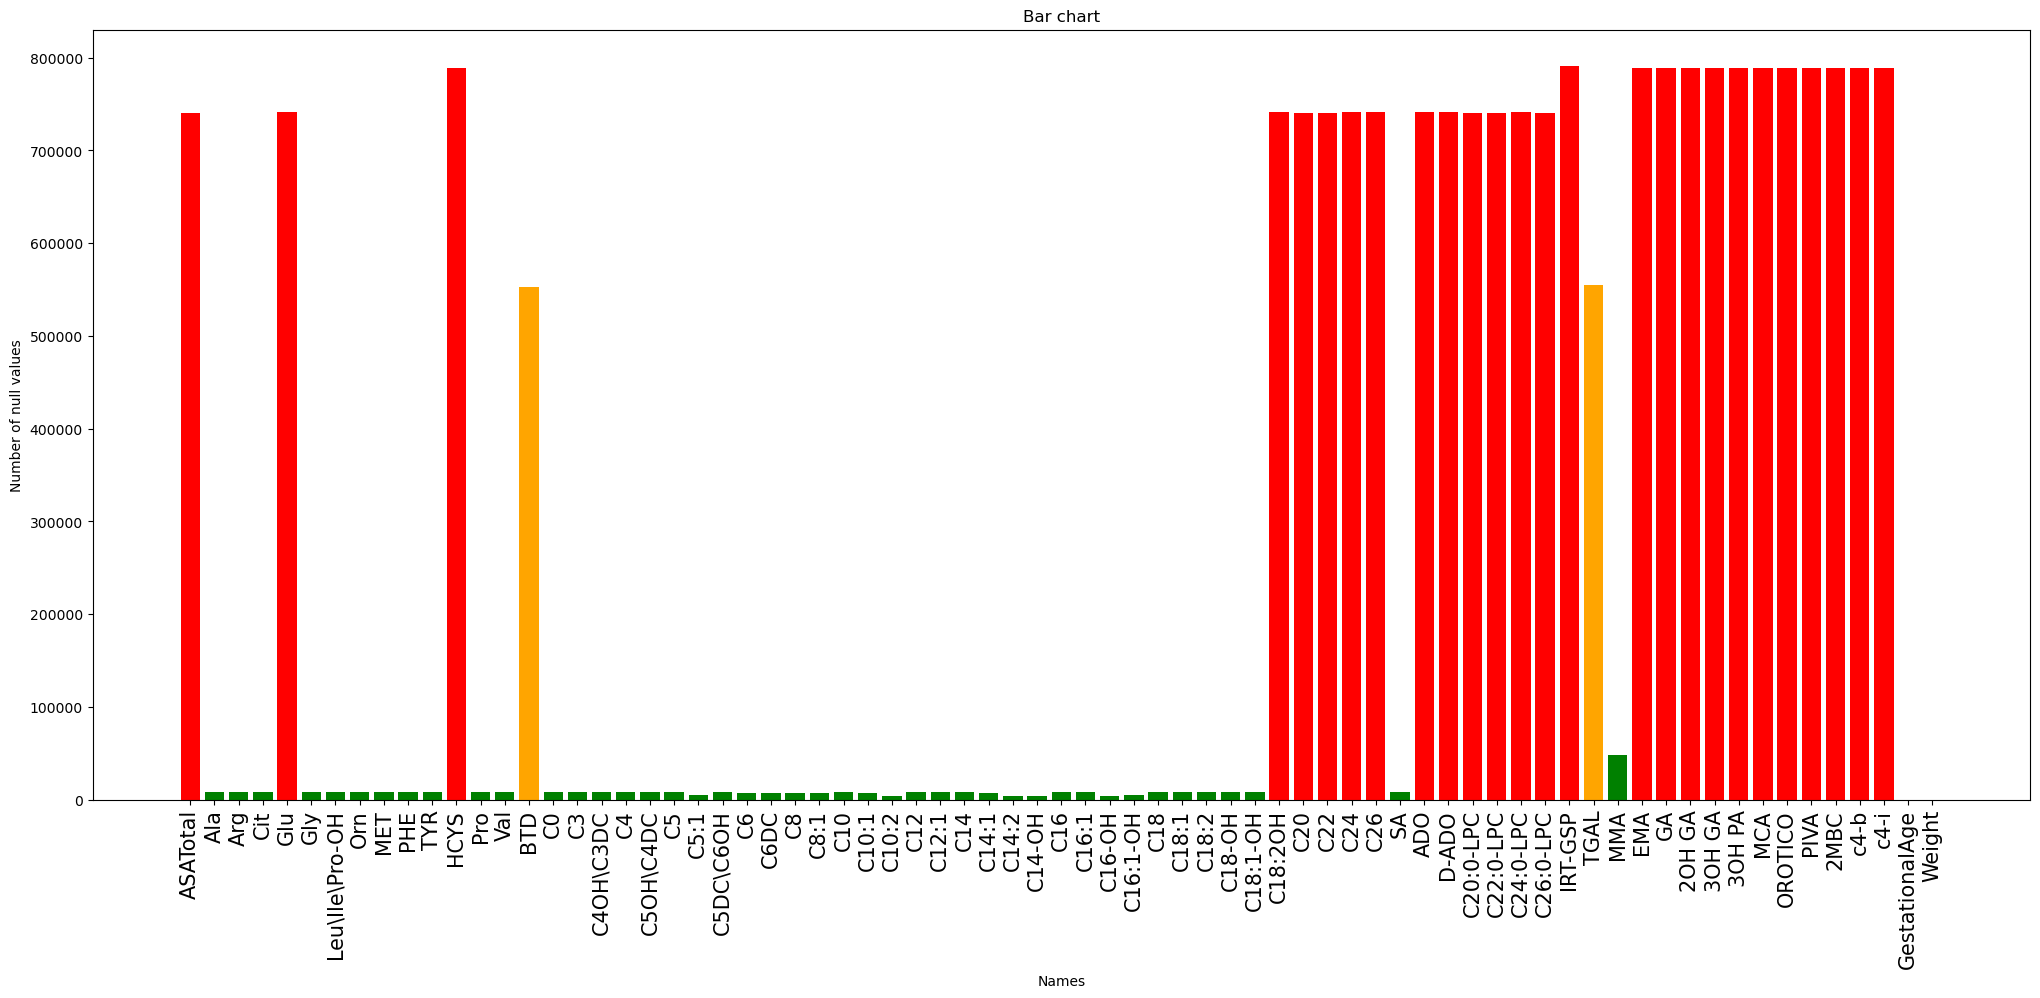

In [73]:
i = 0
x = colonne_numeriche
colors = []
y = []

for val in colonne_numeriche:
    percentage = (babies_def[val].null_count()/babies_def.shape[0])*100
    if percentage > 90:
        colors.append('red')
        i = i+1
    elif percentage > 50:
        colors.append('orange')
    else:
        colors.append('green')
    y.append(babies_def[val].null_count())

plt.figure(figsize=(25, 10))
plt.bar(x, y, color = colors)
plt.xlabel('Names')
plt.ylabel('Number of null values')
plt.title('Bar chart')
plt.xticks(rotation=90, fontsize = 15)

plt.savefig('missing_new.png')
plt.show()

In [74]:

babies_def.filter(pl.col('DIAGNOSI') != 'SANO')[colonne_numeriche].null_count()

shape: (1, 73)
┌──────────┬─────┬─────┬─────┬───┬──────┬──────┬────────────────┬────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ c4-b ┆ c4-i ┆ GestationalAge ┆ Weight │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---  ┆ ---  ┆ ---            ┆ ---    │
│ u32      ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32  ┆ u32  ┆ u32            ┆ u32    │
╞══════════╪═════╪═════╪═════╪═══╪══════╪══════╪════════════════╪════════╡
│ 197      ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 185  ┆ 185  ┆ 0              ┆ 0      │
└──────────┴─────┴─────┴─────┴───┴──────┴──────┴────────────────┴────────┘

#### Bambini che pesano meno di 1,5 kg

In [77]:
extra_piccoli = babies.filter(pl.col('Weight') < 1500)

In [78]:
extra_piccoli.shape

(8808, 101)

In [79]:
statistics_ppp = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp = pl.concat([statistics_ppp, more_stat])
statistics_ppp

shape: (13, 74)
┌───────────┬───────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i      ┆ Gestation ┆ Weight    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ alAge     ┆ ---       │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64       ┆ ---       ┆ f64       │
│           ┆           ┆           ┆           ┆   ┆          ┆           ┆ f64       ┆           │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 451.0     ┆ 8280.0    ┆ 6588.0    ┆ … ┆ 44.0     ┆ 42.0      ┆ 8808.0    ┆ 8808.0    │
│ null_coun ┆ 8357.0    ┆ 528.0     ┆ 2220.0    ┆ … ┆ 8764.0   ┆ 8766.0    ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ mean      ┆ 0.366816  ┆ 261.76846 ┆ 18.841047 ┆ … ┆ 0.317637 ┆ 0.265639  ┆ 29.383061 ┆ 1118.9057 │
│           ┆           ┆ 8         ┆           ┆   ┆          ┆           ┆           ┆ 67        │
│ std       ┆ 0.223068  ┆ 100.84332 ┆ 10.27796  ┆ … ┆ 0.436486 ┆ 0.135911  ┆ 3.010929  ┆ 296.34145 │
│           ┆           ┆ 3         ┆           ┆   ┆          ┆           ┆           ┆           │
│ min       ┆ 0.089     ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.031214 ┆ 0.051908  ┆ 23.0      ┆ 350.0     │
│ 25%       ┆ 0.24      ┆ 186.48    ┆ 10.11     ┆ … ┆ 0.091934 ┆ 0.1611    ┆ 27.0      ┆ 900.0     │
│ 50%       ┆ 0.315     ┆ 244.4     ┆ 17.92     ┆ … ┆ 0.152204 ┆ 0.244416  ┆ 30.0      ┆ 1170.0    │
│ 75%       ┆ 0.44      ┆ 323.03    ┆ 26.92     ┆ … ┆ 0.334111 ┆ 0.379853  ┆ 31.0      ┆ 1385.0    │
│ max       ┆ 2.514     ┆ 553.61    ┆ 50.27     ┆ … ┆ 2.280482 ┆ 0.646422  ┆ 41.0      ┆ 1499.0    │
│ 99%       ┆ 1.273     ┆ 527.65    ┆ 39.42     ┆ … ┆ 2.280482 ┆ 0.646422  ┆ 36.0      ┆ 1495.0    │
│ 1%        ┆ 0.123     ┆ 91.98     ┆ 1.97      ┆ … ┆ 0.031214 ┆ 0.051908  ┆ 23.0      ┆ 440.0     │
│ Kurtosis  ┆ 25.635397 ┆ -0.081119 ┆ -0.991303 ┆ … ┆ 8.486126 ┆ -0.223584 ┆ -0.224083 ┆ -0.820937 │
│ Skewness  ┆ 3.811275  ┆ 0.657007  ┆ 0.245399  ┆ … ┆ 2.820727 ┆ 0.547125  ┆ 0.015968  ┆ -0.511791 │
└───────────┴───────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

In [80]:
colonne_strane_ppp = []

for col in colonne_numeriche:
    max_ = extra_piccoli[col].max()
    perc = extra_piccoli.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_ppp.append(col)
colonne_strane_ppp

['MET', 'C14:2', 'C14-OH', 'C16-OH', 'C18-OH', 'C18:1-OH']

In [81]:
len(colonne_strane_ppp)

6

In [82]:
for col in colonne_strane_ppp:
    perc = extra_piccoli.select(pl.col(col).quantile(0.99)).item()
    extra_piccoli = extra_piccoli.with_columns(pl.when((pl.col(col) > perc) & (pl.col("DIAGNOSI") == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [87]:
statistics_ppp2 = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp2 = pl.concat([statistics_ppp2, more_stat])
statistics_ppp2 = statistics_ppp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [92]:
statistics_ppp2

shape: (13, 74)
┌────────────┬──────────┬─────────┬────────┬───┬────────┬────────┬────────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala     ┆ Arg    ┆ … ┆ c4-b   ┆ c4-i   ┆ GestationalAge ┆ Weight   │
│ ---        ┆ ---      ┆ ---     ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---            ┆ ---      │
│ str        ┆ f64      ┆ f64     ┆ f64    ┆   ┆ f64    ┆ f64    ┆ f64            ┆ f64      │
╞════════════╪══════════╪═════════╪════════╪═══╪════════╪════════╪════════════════╪══════════╡
│ count      ┆ 451.0    ┆ 8280.0  ┆ 6588.0 ┆ … ┆ 44.0   ┆ 42.0   ┆ 8808.0         ┆ 8808.0   │
│ null_count ┆ 8357.0   ┆ 528.0   ┆ 2220.0 ┆ … ┆ 8764.0 ┆ 8766.0 ┆ 0.0            ┆ 0.0      │
│ mean       ┆ 0.367    ┆ 261.768 ┆ 18.841 ┆ … ┆ 0.318  ┆ 0.266  ┆ 29.383         ┆ 1118.906 │
│ std        ┆ 0.223    ┆ 100.843 ┆ 10.278 ┆ … ┆ 0.436  ┆ 0.136  ┆ 3.011          ┆ 296.341  │
│ min        ┆ 0.089    ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 350.0    │
│ 25%        ┆ 0.24     ┆ 186.48  ┆ 10.11  ┆ … ┆ 0.092  ┆ 0.161  ┆ 27.0           ┆ 900.0    │
│ 50%        ┆ 0.315    ┆ 244.4   ┆ 17.92  ┆ … ┆ 0.152  ┆ 0.244  ┆ 30.0           ┆ 1170.0   │
│ 75%        ┆ 0.44     ┆ 323.03  ┆ 26.92  ┆ … ┆ 0.334  ┆ 0.38   ┆ 31.0           ┆ 1385.0   │
│ max        ┆ 2.514    ┆ 553.61  ┆ 50.27  ┆ … ┆ 2.28   ┆ 0.646  ┆ 41.0           ┆ 1499.0   │
│ 99%        ┆ 1.273    ┆ 527.65  ┆ 39.42  ┆ … ┆ 2.28   ┆ 0.646  ┆ 36.0           ┆ 1495.0   │
│ 1%         ┆ 0.123    ┆ 91.98   ┆ 1.97   ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 440.0    │
│ Kurtosis   ┆ 25.635   ┆ -0.081  ┆ -0.991 ┆ … ┆ 8.486  ┆ -0.224 ┆ -0.224         ┆ -0.821   │
│ Skewness   ┆ 3.811    ┆ 0.657   ┆ 0.245  ┆ … ┆ 2.821  ┆ 0.547  ┆ 0.016          ┆ -0.512   │
└────────────┴──────────┴─────────┴────────┴───┴────────┴────────┴────────────────┴──────────┘

In [93]:
header = statistics_ppp2["statistic"].to_list()

prova = statistics_ppp2.transpose(include_header=True)

prova.columns = ['Name'] + header
prova[1:]

shape: (73, 14)
┌────────────────┬────────┬────────────┬───────────┬───┬───────────┬────────┬──────────┬──────────┐
│ Name           ┆ count  ┆ null_count ┆ mean      ┆ … ┆ 99%       ┆ 1%     ┆ Kurtosis ┆ Skewness │
│ ---            ┆ ---    ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---      ┆ ---      │
│ str            ┆ str    ┆ str        ┆ str       ┆   ┆ str       ┆ str    ┆ str      ┆ str      │
╞════════════════╪════════╪════════════╪═══════════╪═══╪═══════════╪════════╪══════════╪══════════╡
│ ASATotal       ┆ 451.0  ┆ 8357.0     ┆ 0.367     ┆ … ┆ 1.273     ┆ 0.123  ┆ 25.635   ┆ 3.811    │
│ Ala            ┆ 8280.0 ┆ 528.0      ┆ 261.768   ┆ … ┆ 527.65    ┆ 91.98  ┆ -0.081   ┆ 0.657    │
│ Arg            ┆ 6588.0 ┆ 2220.0     ┆ 18.841    ┆ … ┆ 39.42     ┆ 1.97   ┆ -0.991   ┆ 0.245    │
│ Cit            ┆ 8414.0 ┆ 394.0      ┆ 15.841    ┆ … ┆ 30.16     ┆ 4.67   ┆ -0.232   ┆ 0.422    │
│ Glu            ┆ 441.0  ┆ 8367.0     ┆ 233.194   ┆ … ┆ 421.75    ┆ 86.308 ┆ -0.352   ┆ 0.285    │
│ Gly            ┆ 8602.0 ┆ 206.0      ┆ 434.386   ┆ … ┆ 847.35    ┆ 131.99 ┆ -0.073   ┆ 0.453    │
│ Leu\Ile\Pro-OH ┆ 6820.0 ┆ 1988.0     ┆ 188.728   ┆ … ┆ 273.799   ┆ 64.205 ┆ -0.585   ┆ -0.411   │
│ Orn            ┆ 8414.0 ┆ 394.0      ┆ 130.189   ┆ … ┆ 265.4     ┆ 28.3   ┆ -0.439   ┆ 0.399    │
│ MET            ┆ 6391.0 ┆ 2417.0     ┆ 24.791    ┆ … ┆ 39.22     ┆ 8.01   ┆ 15.169   ┆ 0.821    │
│ PHE            ┆ 7154.0 ┆ 1654.0     ┆ 68.794    ┆ … ┆ 97.76     ┆ 29.15  ┆ 2.387    ┆ -0.091   │
│ TYR            ┆ 8107.0 ┆ 701.0      ┆ 84.841    ┆ … ┆ 219.24    ┆ 9.12   ┆ 0.581    ┆ 0.871    │
│ HCYS           ┆ 44.0   ┆ 8764.0     ┆ 2.163     ┆ … ┆ 6.506     ┆ 0.463  ┆ 2.497    ┆ 1.396    │
│ Pro            ┆ 8058.0 ┆ 750.0      ┆ 179.412   ┆ … ┆ 319.1     ┆ 65.42  ┆ -0.389   ┆ 0.39     │
│ Val            ┆ 7241.0 ┆ 1567.0     ┆ 169.277   ┆ … ┆ 258.67    ┆ 55.8   ┆ -0.743   ┆ -0.26    │
│ BTD            ┆ 2234.0 ┆ 6574.0     ┆ 211.044   ┆ … ┆ 354.325   ┆ 74.601 ┆ -0.801   ┆ 0.083    │
│ C0             ┆ 7035.0 ┆ 1773.0     ┆ 27.441    ┆ … ┆ 49.48     ┆ 7.85   ┆ -0.701   ┆ 0.29     │
│ C3             ┆ 8321.0 ┆ 487.0      ┆ 2.399     ┆ … ┆ 5.16      ┆ 0.28   ┆ -0.521   ┆ 0.329    │
│ C4OH\C3DC      ┆ 8778.0 ┆ 30.0       ┆ 0.136     ┆ … ┆ 0.35      ┆ 0.03   ┆ 1.843    ┆ 1.156    │
│ C4             ┆ 7998.0 ┆ 810.0      ┆ 0.365     ┆ … ┆ 0.72      ┆ 0.085  ┆ 0.313    ┆ 0.454    │
│ C5OH\C4DC      ┆ 8701.0 ┆ 107.0      ┆ 0.184     ┆ … ┆ 0.377     ┆ 0.07   ┆ 0.71     ┆ 0.746    │
│ C5             ┆ 5826.0 ┆ 2982.0     ┆ 0.248     ┆ … ┆ 0.38      ┆ 0.08   ┆ -0.761   ┆ -0.227   │
│ C5:1           ┆ 8654.0 ┆ 154.0      ┆ 0.014     ┆ … ┆ 0.03      ┆ 0.0    ┆ 0.115    ┆ 0.504    │
│ C5DC\C6OH      ┆ 8669.0 ┆ 139.0      ┆ 0.118     ┆ … ┆ 0.24      ┆ 0.04   ┆ 0.403    ┆ 0.694    │
│ C6             ┆ 8399.0 ┆ 409.0      ┆ 0.05      ┆ … ┆ 0.11      ┆ 0.01   ┆ 0.128    ┆ 0.66     │
│ C6DC           ┆ 8777.0 ┆ 31.0       ┆ 0.083     ┆ … ┆ 0.21      ┆ 0.01   ┆ 1.683    ┆ 1.019    │
│ C8             ┆ 8306.0 ┆ 502.0      ┆ 0.074     ┆ … ┆ 0.18      ┆ 0.01   ┆ 0.105    ┆ 0.76     │
│ C8:1           ┆ 7557.0 ┆ 1251.0     ┆ 0.068     ┆ … ┆ 0.15      ┆ 0.01   ┆ -0.803   ┆ 0.369    │
│ C10            ┆ 8755.0 ┆ 53.0       ┆ 0.054     ┆ … ┆ 0.17      ┆ 0.01   ┆ 6.584    ┆ 1.91     │
│ C10:1          ┆ 7995.0 ┆ 813.0      ┆ 0.048     ┆ … ┆ 0.11      ┆ 0.01   ┆ 0.064    ┆ 0.751    │
│ C10:2          ┆ 8065.0 ┆ 743.0      ┆ 0.006     ┆ … ┆ 0.02      ┆ 0.0    ┆ -0.768   ┆ 0.688    │
│ C12            ┆ 8796.0 ┆ 12.0       ┆ 0.042     ┆ … ┆ 0.12      ┆ 0.01   ┆ 13.305   ┆ 2.404    │
│ C12:1          ┆ 8796.0 ┆ 12.0       ┆ 0.031     ┆ … ┆ 0.1       ┆ 0.01   ┆ 17.099   ┆ 2.773    │
│ C14            ┆ 8782.0 ┆ 26.0       ┆ 0.148     ┆ … ┆ 0.38      ┆ 0.04   ┆ 1.839    ┆ 1.156    │
│ C14:1          ┆ 8794.0 ┆ 14.0       ┆ 0.064     ┆ … ┆ 0.18      ┆ 0.01   ┆ 6.29     ┆ 1.632    │
│ C14:2          ┆ 8298.0 ┆ 510.0      ┆ 0.024     ┆ … ┆ 0.05      ┆ 0.0    ┆ 67.522

In [94]:
prova_bis = prova['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [95]:
statistics_ppp2_pandas = prova_bis.to_pandas()

# Esporta come tabella LaTeX
statistiche_1500 = statistics_ppp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("extra_piccoli.tex", "w") as f:
    f.write(statistiche_1500)

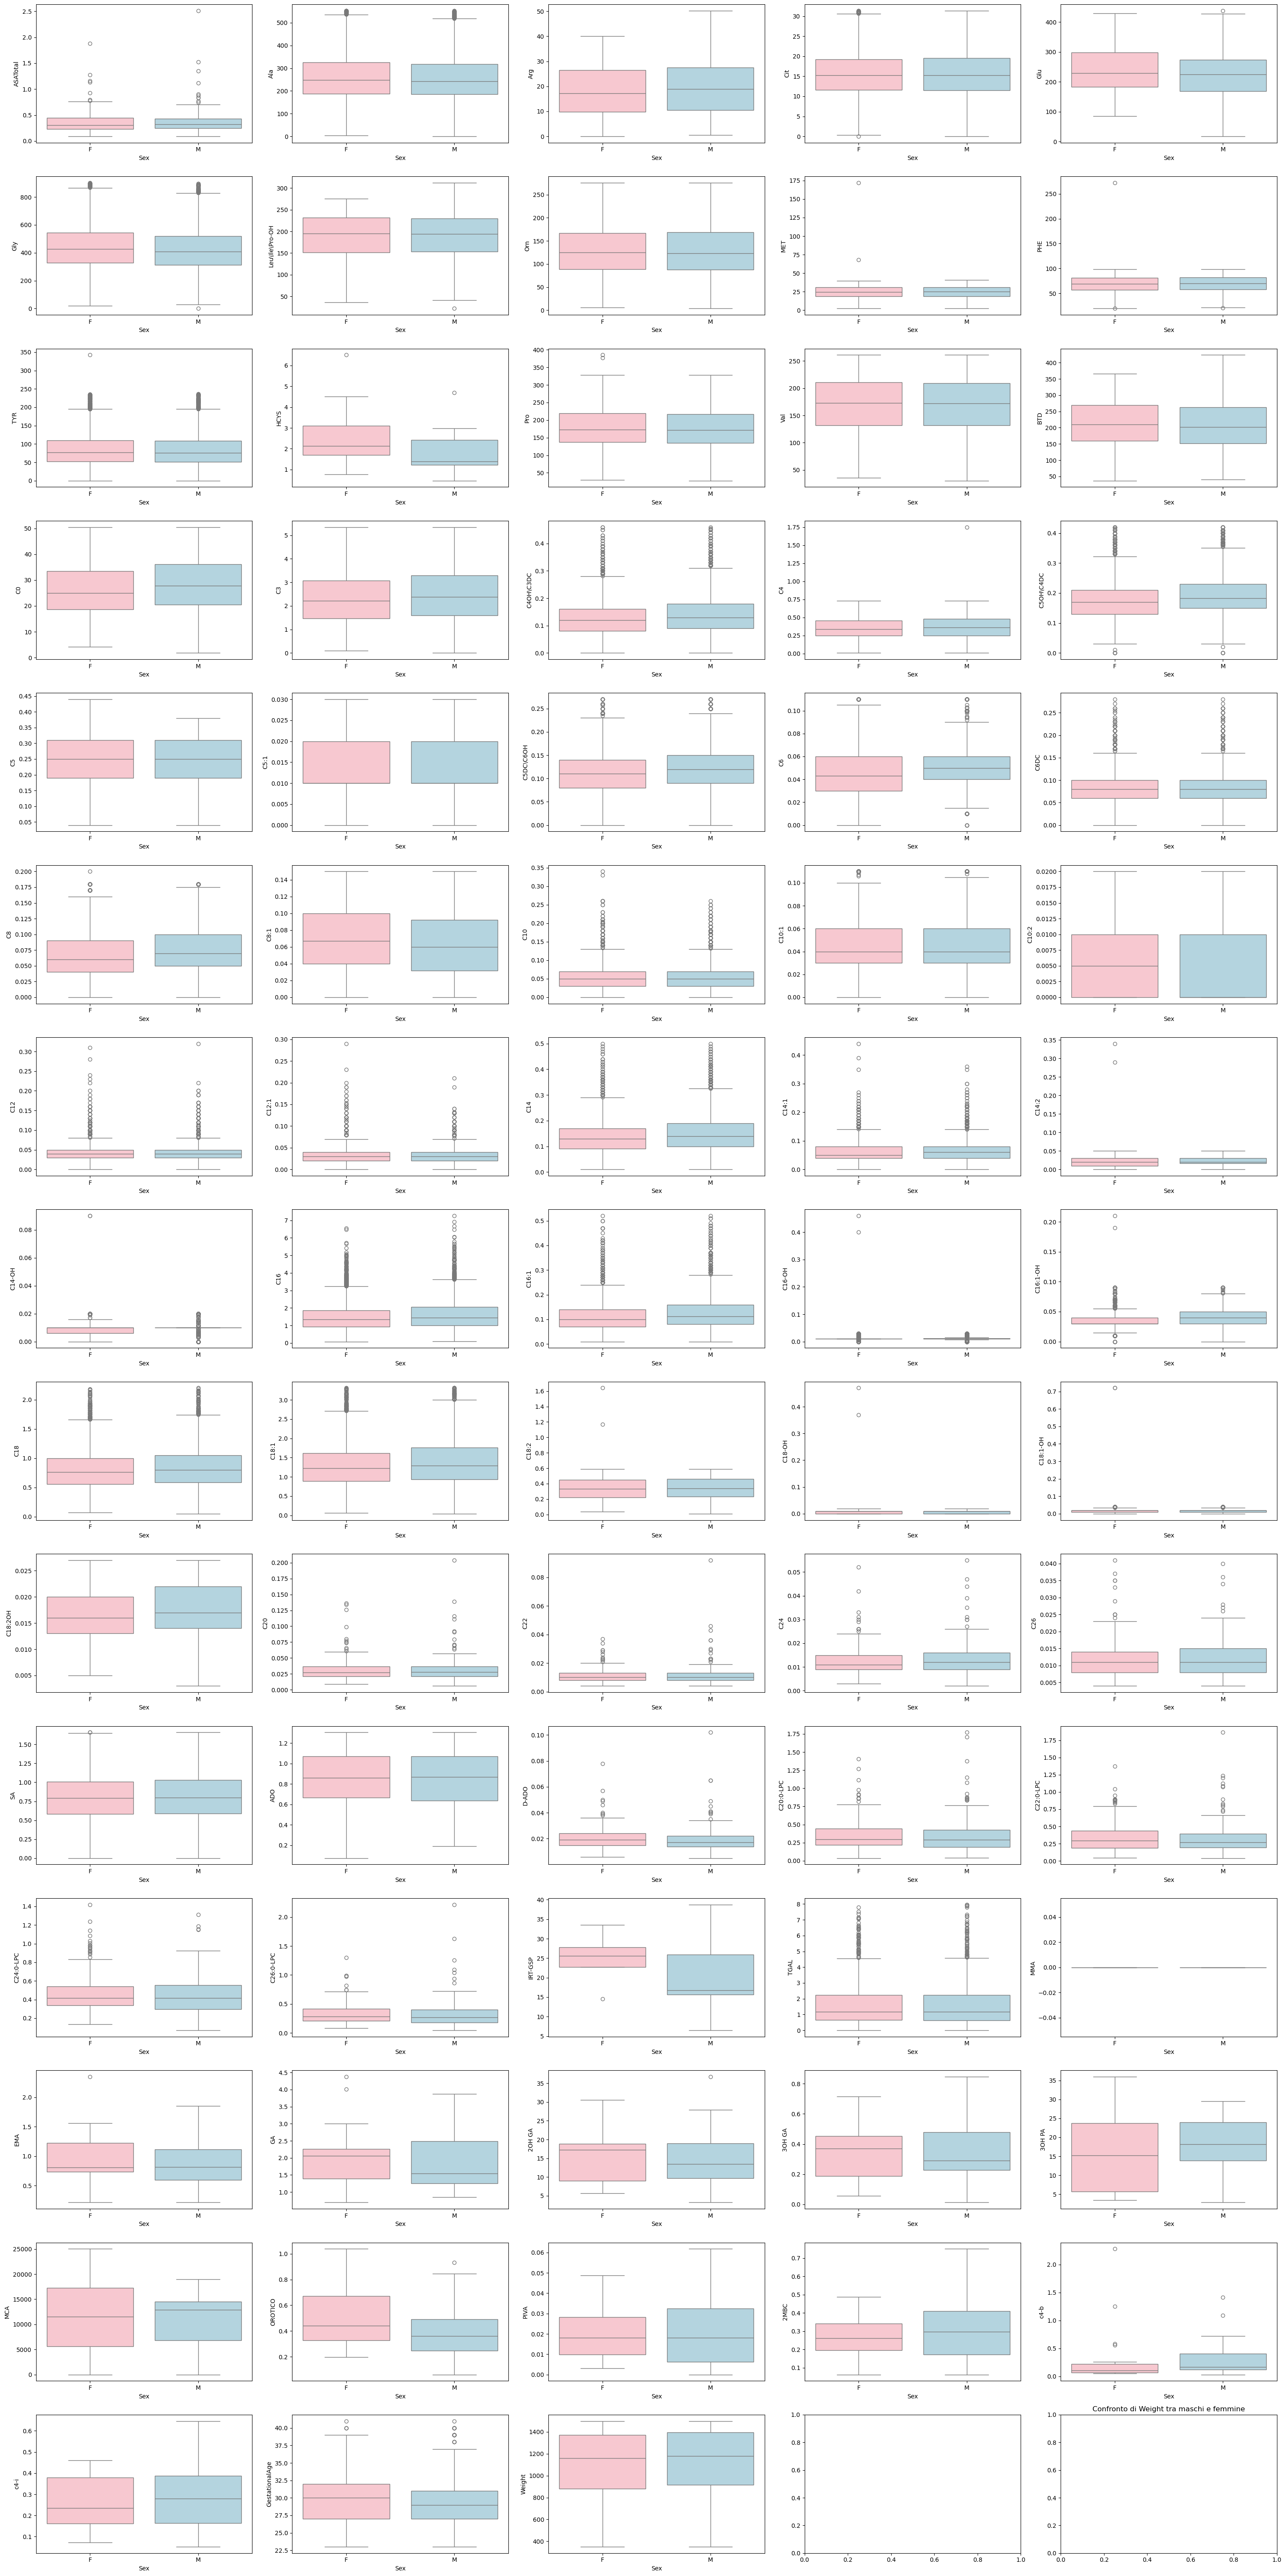

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in extra_piccoli[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=extra_piccoli, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccolissimi.png')
plt.tight_layout()

#### Bambini che pesano tra 1,5 r 2 kg

In [98]:
piccoli_pic = babies.filter((pl.col('Weight') >= 1500) & (pl.col('Weight') < 2000))

In [99]:
piccoli_pic.shape

(11942, 101)

In [100]:
statistics_pp = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp = pl.concat([statistics_pp, more_stat])
statistics_pp

shape: (13, 74)
┌────────────┬───────────┬───────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal  ┆ Ala       ┆ Arg       ┆ … ┆ c4-b     ┆ c4-i     ┆ Gestation ┆ Weight    │
│ ---        ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---      ┆ alAge     ┆ ---       │
│ str        ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64      ┆ ---       ┆ f64       │
│            ┆           ┆           ┆           ┆   ┆          ┆          ┆ f64       ┆           │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 597.0     ┆ 11661.0   ┆ 10984.0   ┆ … ┆ 46.0     ┆ 46.0     ┆ 11942.0   ┆ 11942.0   │
│ null_count ┆ 11345.0   ┆ 281.0     ┆ 958.0     ┆ … ┆ 11896.0  ┆ 11896.0  ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 0.277881  ┆ 249.85354 ┆ 12.626105 ┆ … ┆ 0.280456 ┆ 0.203126 ┆ 33.836543 ┆ 1801.9807 │
│            ┆           ┆ 8         ┆           ┆   ┆          ┆          ┆           ┆ 4         │
│ std        ┆ 0.202481  ┆ 91.801177 ┆ 9.214045  ┆ … ┆ 0.321173 ┆ 0.121043 ┆ 2.014871  ┆ 132.43832 │
│            ┆           ┆           ┆           ┆   ┆          ┆          ┆           ┆ 8         │
│ min        ┆ 0.08      ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.039109 ┆ 0.039807 ┆ 23.0      ┆ 1500.0    │
│ 25%        ┆ 0.176     ┆ 183.38    ┆ 5.39      ┆ … ┆ 0.086667 ┆ 0.105307 ┆ 32.0      ┆ 1700.0    │
│ 50%        ┆ 0.232     ┆ 235.67    ┆ 9.93      ┆ … ┆ 0.133356 ┆ 0.183026 ┆ 34.0      ┆ 1820.0    │
│ 75%        ┆ 0.307     ┆ 302.59    ┆ 17.79     ┆ … ┆ 0.359565 ┆ 0.235564 ┆ 35.0      ┆ 1920.0    │
│ max        ┆ 1.885     ┆ 553.4     ┆ 40.08     ┆ … ┆ 1.237556 ┆ 0.514818 ┆ 41.0      ┆ 1999.0    │
│ 99%        ┆ 1.119     ┆ 514.32    ┆ 38.08     ┆ … ┆ 1.237556 ┆ 0.514818 ┆ 38.0      ┆ 1991.0    │
│ 1%         ┆ 0.094     ┆ 90.25     ┆ 1.04      ┆ … ┆ 0.039109 ┆ 0.039807 ┆ 29.0      ┆ 1520.0    │
│ Kurtosis   ┆ 27.485542 ┆ 0.388911  ┆ 0.217475  ┆ … ┆ 1.782011 ┆ 0.229632 ┆ -0.145064 ┆ -0.972601 │
│ Skewness   ┆ 4.486058  ┆ 0.736794  ┆ 0.996687  ┆ … ┆ 1.679867 ┆ 0.985941 ┆ 0.002537  ┆ -0.360445 │
└────────────┴───────────┴───────────┴───────────┴───┴──────────┴──────────┴───────────┴───────────┘

In [101]:
colonne_strane_pp = []

for col in colonne_numeriche:
    max_ = piccoli_pic[col].max()
    perc = piccoli_pic.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_pp.append(col)
colonne_strane_pp

[]

In [102]:
len(colonne_strane_pp)

0

In [103]:
for col in colonne_strane_pp:
    perc = piccoli_pic.select(pl.col(col).quantile(0.99)).item()
    piccoli_pic = piccoli_pic.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [104]:
statistics_pp2 = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp2 = pl.concat([statistics_pp2, more_stat])
statistics_pp2 = statistics_pp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [105]:
header = statistics_pp2["statistic"].to_list()

prova2 = statistics_pp2.transpose(include_header=True)

prova2.columns = ['Name'] + header
prova2[1:]

shape: (73, 14)
┌───────────────┬─────────┬────────────┬───────────┬───┬───────────┬─────────┬──────────┬──────────┐
│ Name          ┆ count   ┆ null_count ┆ mean      ┆ … ┆ 99%       ┆ 1%      ┆ Kurtosis ┆ Skewness │
│ ---           ┆ ---     ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---     ┆ ---      ┆ ---      │
│ str           ┆ str     ┆ str        ┆ str       ┆   ┆ str       ┆ str     ┆ str      ┆ str      │
╞═══════════════╪═════════╪════════════╪═══════════╪═══╪═══════════╪═════════╪══════════╪══════════╡
│ ASATotal      ┆ 597.0   ┆ 11345.0    ┆ 0.278     ┆ … ┆ 1.119     ┆ 0.094   ┆ 27.486   ┆ 4.486    │
│ Ala           ┆ 11661.0 ┆ 281.0      ┆ 249.854   ┆ … ┆ 514.32    ┆ 90.25   ┆ 0.389    ┆ 0.737    │
│ Arg           ┆ 10984.0 ┆ 958.0      ┆ 12.626    ┆ … ┆ 38.08     ┆ 1.04    ┆ 0.217    ┆ 0.997    │
│ Cit           ┆ 11645.0 ┆ 297.0      ┆ 14.221    ┆ … ┆ 29.43     ┆ 4.13    ┆ 0.208    ┆ 0.633    │
│ Glu           ┆ 583.0   ┆ 11359.0    ┆ 236.355   ┆ … ┆ 406.393   ┆ 108.938 ┆ -0.134   ┆ 0.427    │
│ Gly           ┆ 11761.0 ┆ 181.0      ┆ 399.225   ┆ … ┆ 804.37    ┆ 123.48  ┆ 0.312    ┆ 0.561    │
│ Leu\Ile\Pro-O ┆ 11130.0 ┆ 812.0      ┆ 152.162   ┆ … ┆ 268.48    ┆ 62.42   ┆ -0.495   ┆ 0.424    │
│ H             ┆         ┆            ┆           ┆   ┆           ┆         ┆          ┆          │
│ Orn           ┆ 11693.0 ┆ 249.0      ┆ 107.394   ┆ … ┆ 252.13    ┆ 28.26   ┆ 0.413    ┆ 0.866    │
│ MET           ┆ 10803.0 ┆ 1139.0     ┆ 22.259    ┆ … ┆ 39.01     ┆ 7.97    ┆ -0.586   ┆ 0.274    │
│ PHE           ┆ 11214.0 ┆ 728.0      ┆ 58.683    ┆ … ┆ 96.0      ┆ 28.46   ┆ -0.449   ┆ 0.334    │
│ TYR           ┆ 11451.0 ┆ 491.0      ┆ 94.613    ┆ … ┆ 220.67    ┆ 22.78   ┆ 0.357    ┆ 0.842    │
│ HCYS          ┆ 46.0    ┆ 11896.0    ┆ 2.16      ┆ … ┆ 6.982     ┆ 0.701   ┆ 3.848    ┆ 1.746    │
│ Pro           ┆ 11686.0 ┆ 256.0      ┆ 159.895   ┆ … ┆ 305.52    ┆ 63.555  ┆ 0.246    ┆ 0.611    │
│ Val           ┆ 11314.0 ┆ 628.0      ┆ 124.665   ┆ … ┆ 251.93    ┆ 45.04   ┆ -0.163   ┆ 0.687    │
│ BTD           ┆ 3025.0  ┆ 8917.0     ┆ 212.223   ┆ … ┆ 347.452   ┆ 87.177  ┆ -0.653   ┆ 0.138    │
│ C0            ┆ 11060.0 ┆ 882.0      ┆ 25.229    ┆ … ┆ 48.83     ┆ 9.68    ┆ -0.248   ┆ 0.603    │
│ C3            ┆ 11544.0 ┆ 398.0      ┆ 2.161     ┆ … ┆ 5.05      ┆ 0.34    ┆ -0.123   ┆ 0.587    │
│ C4OH\C3DC     ┆ 11917.0 ┆ 25.0       ┆ 0.11      ┆ … ┆ 0.29      ┆ 0.03    ┆ 3.505    ┆ 1.456    │
│ C4            ┆ 11643.0 ┆ 299.0      ┆ 0.271     ┆ … ┆ 0.67      ┆ 0.08    ┆ 1.2      ┆ 1.112    │
│ C5OH\C4DC     ┆ 11867.0 ┆ 75.0       ┆ 0.171     ┆ … ┆ 0.35      ┆ 0.07    ┆ 1.173    ┆ 0.799    │
│ C5            ┆ 11084.0 ┆ 858.0      ┆ 0.185     ┆ … ┆ 0.37      ┆ 0.07    ┆ -0.217   ┆ 0.631    │
│ C5:1          ┆ 11864.0 ┆ 78.0       ┆ 0.01      ┆ … ┆ 0.03      ┆ 0.0     ┆ 1.427    ┆ 0.465    │
│ C5DC\C6OH     ┆ 11858.0 ┆ 84.0       ┆ 0.107     ┆ … ┆ 0.23      ┆ 0.04    ┆ 1.044    ┆ 0.858    │
│ C6            ┆ 11793.0 ┆ 149.0      ┆ 0.045     ┆ … ┆ 0.1       ┆ 0.01    ┆ 0.8      ┆ 0.826    │
│ C6DC          ┆ 11904.0 ┆ 38.0       ┆ 0.085     ┆ … ┆ 0.21      ┆ 0.013   ┆ 1.487    ┆ 0.937    │
│ C8            ┆ 11853.0 ┆ 89.0       ┆ 0.055     ┆ … ┆ 0.14      ┆ 0.01    ┆ 2.293    ┆ 1.229    │
│ C8:1          ┆ 11240.0 ┆ 702.0      ┆ 0.062     ┆ … ┆ 0.15      ┆ 0.01    ┆ -0.163   ┆ 0.679    │
│ C10           ┆ 11899.0 ┆ 43.0       ┆ 0.057     ┆ … ┆ 0.17      ┆ 0.01    ┆ 4.244    ┆ 1.605    │
│ C10:1         ┆ 11654.0 ┆ 288.0      ┆ 0.047     ┆ … ┆ 0.1       ┆ 0.01    ┆ 0.085    ┆ 0.607    │
│ C10:2         ┆ 11724.0 ┆ 218.0      ┆ 0.005     ┆ … ┆ 0.02      ┆ 0.0     ┆ 0.013    ┆ 1.01     │
│ C12           ┆ 11917.0 ┆ 25.0       ┆ 0.059     ┆ … ┆ 0.18      ┆ 0.02    ┆ 8.199    ┆ 2.11     │
│ C12:1         ┆ 11917.0 ┆ 25.0       ┆ 0.04      ┆ … ┆ 0.14      ┆ 0.01    ┆ 11.832   ┆ 2.543    │
│ C14           ┆ 11882.0 ┆ 60.0       ┆ 0.185     ┆ … ┆ 0.41      ┆ 0.05    ┆ 0.5      ┆ 0.721    │
│ C14:1         ┆ 11912.0 ┆ 30.0       ┆ 0.07

In [106]:
unoemezzodue = prova2['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [107]:
statistics_pp2_pandas = unoemezzodue.to_pandas()

# Esporta come tabella LaTeX
statistiche_2000 = statistics_pp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("unoemezzodue_table.tex", "w") as f:
    f.write(statistiche_2000)

In [108]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in piccoli_pic[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli_pic, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccoli.png')
plt.tight_layout()


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000188CC218FE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

#### Bambini che pesano meno di 2,5 kg

In [ ]:
piccoli = babies.filter((pl.col('Weight') <= 2500) & (pl.col('Weight') > 2000))

In [ ]:
piccoli.shape

In [ ]:
statistics_p = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p = pl.concat([statistics_p, more_stat])
statistics_p

In [ ]:
colonne_strane_p = []

for col in colonne_numeriche:
    max_ = piccoli[col].max()
    perc = piccoli.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_p.append(col)
colonne_strane_p

In [ ]:
for col in colonne_strane_p:
    perc = piccoli.select(pl.col(col).quantile(0.99)).item()
    piccoli = piccoli.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [ ]:
statistics_p2 = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p2 = pl.concat([statistics_p2, more_stat])
statistics_p2 = statistics_p2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_p2

In [ ]:
header = statistics_p2["statistic"].to_list()

prova3 = statistics_p2.transpose(include_header=True)

prova3.columns = ['Name'] + header
prova3[1:]

In [ ]:
duemezzo = prova3['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [ ]:
statistics_p2_pandas = duemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_2500 = statistics_p2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("duemezzo_table.tex", "w") as f:
    f.write(statistiche_2500)

In [ ]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in piccoli[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_medi.png')
plt.tight_layout()

#### Bambini che pesano più di 2,5 kg

In [ ]:
ciccioni = babies.filter(pl.col('Weight') > 2500)

In [ ]:
ciccioni.shape

In [ ]:
statistics_c = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c = pl.concat([statistics_c, more_stat])
statistics_c

In [ ]:
colonne_strane_c = []

for col in colonne_numeriche:
    max_ = ciccioni[col].max()
    perc = ciccioni.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_c.append(col)
colonne_strane_c

In [ ]:
len(colonne_strane_c)

In [ ]:
for col in colonne_strane_c:
    perc = ciccioni.select(pl.col(col).quantile(0.99)).item()
    ciccioni = ciccioni.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [ ]:
statistics_c2 = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c2 = pl.concat([statistics_c2, more_stat])
statistics_c2 = statistics_c2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_c2

In [ ]:
header = statistics_c2["statistic"].to_list()

prova4 = statistics_c2.transpose(include_header=True)

prova4.columns = ['Name'] + header
prova4[1:]

In [ ]:
daduemezzo = prova4['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [ ]:
statistics_c2_pandas = daduemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_3000 = statistics_c2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("daduemezzo_table.tex", "w") as f:
    f.write(statistiche_3000)

In [ ]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in ciccioni[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=ciccioni, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_grandi.png')
plt.tight_layout()

**Tabellina carina**

In [ ]:
ciccioni.shape[0]

In [ ]:
piccoli.shape[0]

In [ ]:
extra_piccoli.shape[0]

In [ ]:
piccoli_pic.shape[0]

In [ ]:
from tabulate import tabulate

# Creazione di un DataFrame Polars
data = {
    'Weight': ['> 2500','2500-2000', '2000-1500', '1500 >'],
    'Size': [ciccioni.shape[0], piccoli.shape[0], piccoli_pic.shape[0], extra_piccoli.shape[0]]
}

df = pl.DataFrame(data)

# Converti Polars DataFrame in Pandas DataFrame per usare tabulate
df_pandas = df.to_pandas()

# Visualizza la tabella con il formato 'grid'
print(tabulate(df_pandas, headers='keys', tablefmt='grid', showindex=False))


#### Distribution comparison

In [ ]:
n1 = extra_piccoli.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [ ]:
n2 = piccoli_pic.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [ ]:
n3 = piccoli.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [ ]:
n4 = ciccioni.filter(pl.col('DIAGNOSI') != 'SANO').shape[0]

In [ ]:
p1 = round((n1/extra_piccoli.shape[0]) * 100, 2)
p2 = round((n2/piccoli_pic.shape[0]) * 100, 2)
p3 = round((n3/piccoli.shape[0]) * 100, 2) 
p4 = round((n4/ciccioni.shape[0]) * 100, 2)

In [ ]:
data = {
    'Weight': ['< 1500', '1500 - 2000', ' 2000 - 2500', ' > 2500'],
    'Size': [extra_piccoli.shape[0], piccoli_pic.shape[0], piccoli.shape[0], ciccioni.shape[0]],
    'Positives': [n1, n2, n3, n4],
    'Percentage': [p1, p2, p3, p4]
}

# Creiamo il DataFrame
dati = pd.DataFrame(data)

In [ ]:
dati.to_csv('dati.csv', index=False)

In [ ]:
babies.shape

#### Again

In [142]:
babies_def.columns

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'DateOfBirth',
 'Sex',
 'GestationalAge',
 'SamDateCollected',
 'SamDateReceived',
 'Weight',
 'AntibioticsBaby',
 'AntibioticsMother',
 'Meconium',
 'CortisoneBaby',
 'CortisoneMother',
 'TyroidMother',
 'Premature',
 'TooYoung',
 'BabyFed',
 'HUFeed',
 'MIXFeed',
 'ARTFeed',
 'TPNFeed',
 'ENFeed',
 'TPNCAR

In [ ]:
colonne_strane_tot = []

for col in colonne_numeriche:
    max_ = babies_def[col].max()
    perc = babies_def.select(pl.col(col).quantile(0.99)).item()
    if (max_ - perc) > 3*perc:
        colonne_strane_tot.append(col)
colonne_strane_tot

In [ ]:
len(colonne_strane_tot)

In [ ]:
for col in colonne_strane_tot:
    perc = babies_def.select(pl.col(col).quantile(0.99)).item()
    babies_def = babies_def.with_columns(pl.when((pl.col(col) > perc) & (pl.col('DIAGNOSI') == 'SANO')).then(None).otherwise(pl.col(col)).alias(col))

In [ ]:
babies_no_id[colonne_numeriche].describe()

In [ ]:
babies_no_id.filter(pl.col('Gly') == 448407.956	)

#### Technical Validation

**Type**

In [196]:
for c in babies_def.columns:
    print(f'La colonna {c} ha tipo {babies_def[c].dtype}')

La colonna ASATotal ha tipo Float64
La colonna Ala ha tipo Float64
La colonna Arg ha tipo Float64
La colonna Cit ha tipo Float64
La colonna Glu ha tipo Float64
La colonna Gly ha tipo Float64
La colonna Leu\Ile\Pro-OH ha tipo Float64
La colonna Orn ha tipo Float64
La colonna MET ha tipo Float64
La colonna PHE ha tipo Float64
La colonna TYR ha tipo Float64
La colonna HCYS ha tipo Float64
La colonna Pro ha tipo Float64
La colonna Val ha tipo Float64
La colonna BTD ha tipo Float64
La colonna C0 ha tipo Float64
La colonna C3 ha tipo Float64
La colonna C4OH\C3DC ha tipo Float64
La colonna C4 ha tipo Float64
La colonna C5OH\C4DC ha tipo Float64
La colonna C5 ha tipo Float64
La colonna C5:1 ha tipo Float64
La colonna C5DC\C6OH ha tipo Float64
La colonna C6 ha tipo Float64
La colonna C6DC ha tipo Float64
La colonna C8 ha tipo Float64
La colonna C8:1 ha tipo Float64
La colonna C10 ha tipo Float64
La colonna C10:1 ha tipo Float64
La colonna C10:2 ha tipo Float64
La colonna C12 ha tipo Float64
La 

In [178]:
babies_def = babies_def.with_columns(pl.col("ASATotal").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("Glu").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C18:2OH").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C22").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C24").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C26").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("ADO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("D-ADO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C22:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C24:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C26:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("IRT-GSP").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("EMA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("2OH GA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("3OH GA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("3OH PA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("MCA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("OROTICO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("PIVA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("2MBC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("c4-b").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("c4-i").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("HCYS").cast(pl.Float64))

In [194]:
babies_def = babies_def.with_columns(pl.col("DateOfBirth").str.to_date("%Y-%m-%d"))
babies_def = babies_def.with_columns(pl.col("SamDateCollected").str.to_date("%Y-%m-%d"))
babies_def = babies_def.with_columns(pl.col("SamDateReceived").str.to_date("%Y-%m-%d"))

**Premature**

In [135]:
babies_def.filter(pl.col('GestationalAge') <= 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i64]
[
	1
]

In [137]:
babies_def.filter(pl.col('GestationalAge') > 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i64]
[
	0
]

**DateOfCollection**

In [220]:
babies_def = babies_def.with_columns((pl.col('SamDateCollected') - pl.col('DateOfBirth')).alias('check'))

In [230]:
babies_def = babies_def.with_columns((pl.col("check") / 86400000).alias("check")) #convert check in days

In [258]:
babies_def.shape

(791752, 100)

In [238]:
babies_def.filter(pl.col('check') > 3)

shape: (35_878, 100)
┌──────────┬─────────┬────────┬────────┬───┬───────┬───────────┬──────────┬──────────────┐
│ ASATotal ┆ Ala     ┆ Arg    ┆ Cit    ┆ … ┆ Twins ┆ CATEGORIA ┆ DIAGNOSI ┆ check        │
│ ---      ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---   ┆ ---       ┆ ---      ┆ ---          │
│ f64      ┆ f64     ┆ f64    ┆ f64    ┆   ┆ i64   ┆ str       ┆ str      ┆ duration[ms] │
╞══════════╪═════════╪════════╪════════╪═══╪═══════╪═══════════╪══════════╪══════════════╡
│ null     ┆ 228.77  ┆ 11.44  ┆ 7.49   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 323.415 ┆ 9.835  ┆ 15.21  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 10ms         │
│ null     ┆ 226.4   ┆ null   ┆ 25.76  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 504.4   ┆ 25.56  ┆ 14.66  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 211.05  ┆ 4.01   ┆ 12.23  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 256.41  ┆ 3.71   ┆ 12.85  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 252.85  ┆ 11.69  ┆ 16.64  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 269.14  ┆ 21.39  ┆ 17.29  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 5ms          │
│ null     ┆ 365.23  ┆ 18.5   ┆ 11.86  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 5ms          │
│ null     ┆ 294.25  ┆ null   ┆ 14.62  ┆ … ┆ 1     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 174.65  ┆ null   ┆ 18.0   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 326.52  ┆ 12.98  ┆ 18.71  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 245.76  ┆ 6.89   ┆ 12.47  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 92ms         │
│ null     ┆ 258.38  ┆ 6.29   ┆ 10.03  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 5ms          │
│ null     ┆ 324.01  ┆ 33.29  ┆ 17.12  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 64ms         │
│ null     ┆ 436.94  ┆ null   ┆ 22.33  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 88ms         │
│ null     ┆ 228.025 ┆ 13.315 ┆ 15.13  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 14ms         │
│ null     ┆ 196.56  ┆ 30.33  ┆ 6.37   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 252.41  ┆ 7.42   ┆ 19.47  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 10ms         │
│ null     ┆ 228.43  ┆ 20.13  ┆ 17.66  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 5ms          │
│ null     ┆ 265.22  ┆ 13.91  ┆ 10.34  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 93ms         │
│ null     ┆ 219.44  ┆ null   ┆ 18.58  ┆ … ┆ 1     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 219.04  ┆ null   ┆ 18.18  ┆ … ┆ 1     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 196.84  ┆ 11.21  ┆ 11.59  ┆ … ┆ 1     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 222.71  ┆ 9.62   ┆ 11.13  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 7ms          │
│ null     ┆ 238.95  ┆ 22.84  ┆ 27.92  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 21ms         │
│ null     ┆ 272.12  ┆ 11.37  ┆ 13.19  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 330.37  ┆ 18.69  ┆ 14.35  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 253.74  ┆ 18.24  ┆ 13.6   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 391.1   ┆ 32.6   ┆ 10.44  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 241.15  ┆ 10.27  ┆ 14.18  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 302.69  ┆ 15.43  ┆ 12.05  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 186.73  ┆ 7.08   ┆ 11.0   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 290.63  ┆ 6.98   ┆ 12.3   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 14ms         │
│ null     ┆ 292.68  ┆ 6.83   ┆ 9.33   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 241.87  ┆ 5.72   ┆ 4.46   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 237.9   ┆ 7.69   ┆ 10.89  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 168.12  ┆ 6.65   ┆ 10.0   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 4ms          │
│ null     ┆ 213.39  ┆ 4.9    ┆ 9.15   ┆ … ┆ 0     ┆ null      ┆ S

In [252]:
babies_def.filter((pl.col('check') < 1) & (pl.col('DIAGNOSI') != 'SANO'))

shape: (3, 100)
┌──────────┬────────┬───────┬───────┬───┬───────┬───────────┬──────────┬──────────────┐
│ ASATotal ┆ Ala    ┆ Arg   ┆ Cit   ┆ … ┆ Twins ┆ CATEGORIA ┆ DIAGNOSI ┆ check        │
│ ---      ┆ ---    ┆ ---   ┆ ---   ┆   ┆ ---   ┆ ---       ┆ ---      ┆ ---          │
│ f64      ┆ f64    ┆ f64   ┆ f64   ┆   ┆ i64   ┆ str       ┆ str      ┆ duration[ms] │
╞══════════╪════════╪═══════╪═══════╪═══╪═══════╪═══════════╪══════════╪══════════════╡
│ null     ┆ 243.26 ┆ 17.27 ┆ 13.31 ┆ … ┆ 0     ┆ AA        ┆ HPA      ┆ 0ms          │
│ null     ┆ 662.03 ┆ 1.64  ┆ 14.2  ┆ … ┆ 0     ┆ SC        ┆ SCAD     ┆ 0ms          │
│ null     ┆ 466.16 ┆ 50.27 ┆ 16.46 ┆ … ┆ 0     ┆ SC        ┆ SCAD     ┆ 0ms          │
└──────────┴────────┴───────┴───────┴───┴───────┴───────────┴──────────┴──────────────┘

In [246]:
babies_def.filter((pl.col('check') > 3) & (pl.col('DIAGNOSI') != 'SANO'))['check']

shape: (9,)
Series: 'check' [duration[ms]]
[
	4ms
	14ms
	12ms
	4ms
	15ms
	4ms
	4ms
	9ms
	19ms
]

In [264]:
babies_def.filter((pl.col('check')>1) & (pl.col('check')<4) | (pl.col('DIAGNOSI') != 'SANO'))

shape: (748_716, 100)
┌──────────┬─────────┬────────┬────────┬───┬───────┬───────────┬──────────┬──────────────┐
│ ASATotal ┆ Ala     ┆ Arg    ┆ Cit    ┆ … ┆ Twins ┆ CATEGORIA ┆ DIAGNOSI ┆ check        │
│ ---      ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---   ┆ ---       ┆ ---      ┆ ---          │
│ f64      ┆ f64     ┆ f64    ┆ f64    ┆   ┆ i64   ┆ str       ┆ str      ┆ duration[ms] │
╞══════════╪═════════╪════════╪════════╪═══╪═══════╪═══════════╪══════════╪══════════════╡
│ null     ┆ 248.25  ┆ 10.12  ┆ 13.88  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 265.66  ┆ null   ┆ 28.1   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 279.2   ┆ 3.14   ┆ 16.42  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 334.23  ┆ 2.55   ┆ 12.12  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 297.64  ┆ 8.39   ┆ 9.18   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 193.28  ┆ 15.95  ┆ 25.26  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 198.52  ┆ 8.21   ┆ 11.86  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 357.81  ┆ 3.92   ┆ 9.23   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 280.69  ┆ 10.82  ┆ 14.86  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 204.04  ┆ 10.805 ┆ 15.065 ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 204.82  ┆ 4.27   ┆ 17.81  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 145.39  ┆ 6.31   ┆ 12.46  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 273.18  ┆ 21.7   ┆ 21.62  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 260.39  ┆ 26.36  ┆ 20.52  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 0.0     ┆ 0.0    ┆ 0.0    ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 237.26  ┆ 22.66  ┆ 11.87  ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 2ms          │
│ null     ┆ 164.51  ┆ 9.14   ┆ 7.47   ┆ … ┆ 0     ┆ null      ┆ SANO     ┆ 3ms          │
│ null     ┆ 263.34  ┆ 6.93   ┆ 17.87  ┆ … ┆ 0     ┆ null      ┆ 

In [266]:
babies_def2 = babies_def.filter((pl.col('check')>1) & (pl.col('check')<4) | (pl.col('DIAGNOSI') != 'SANO'))

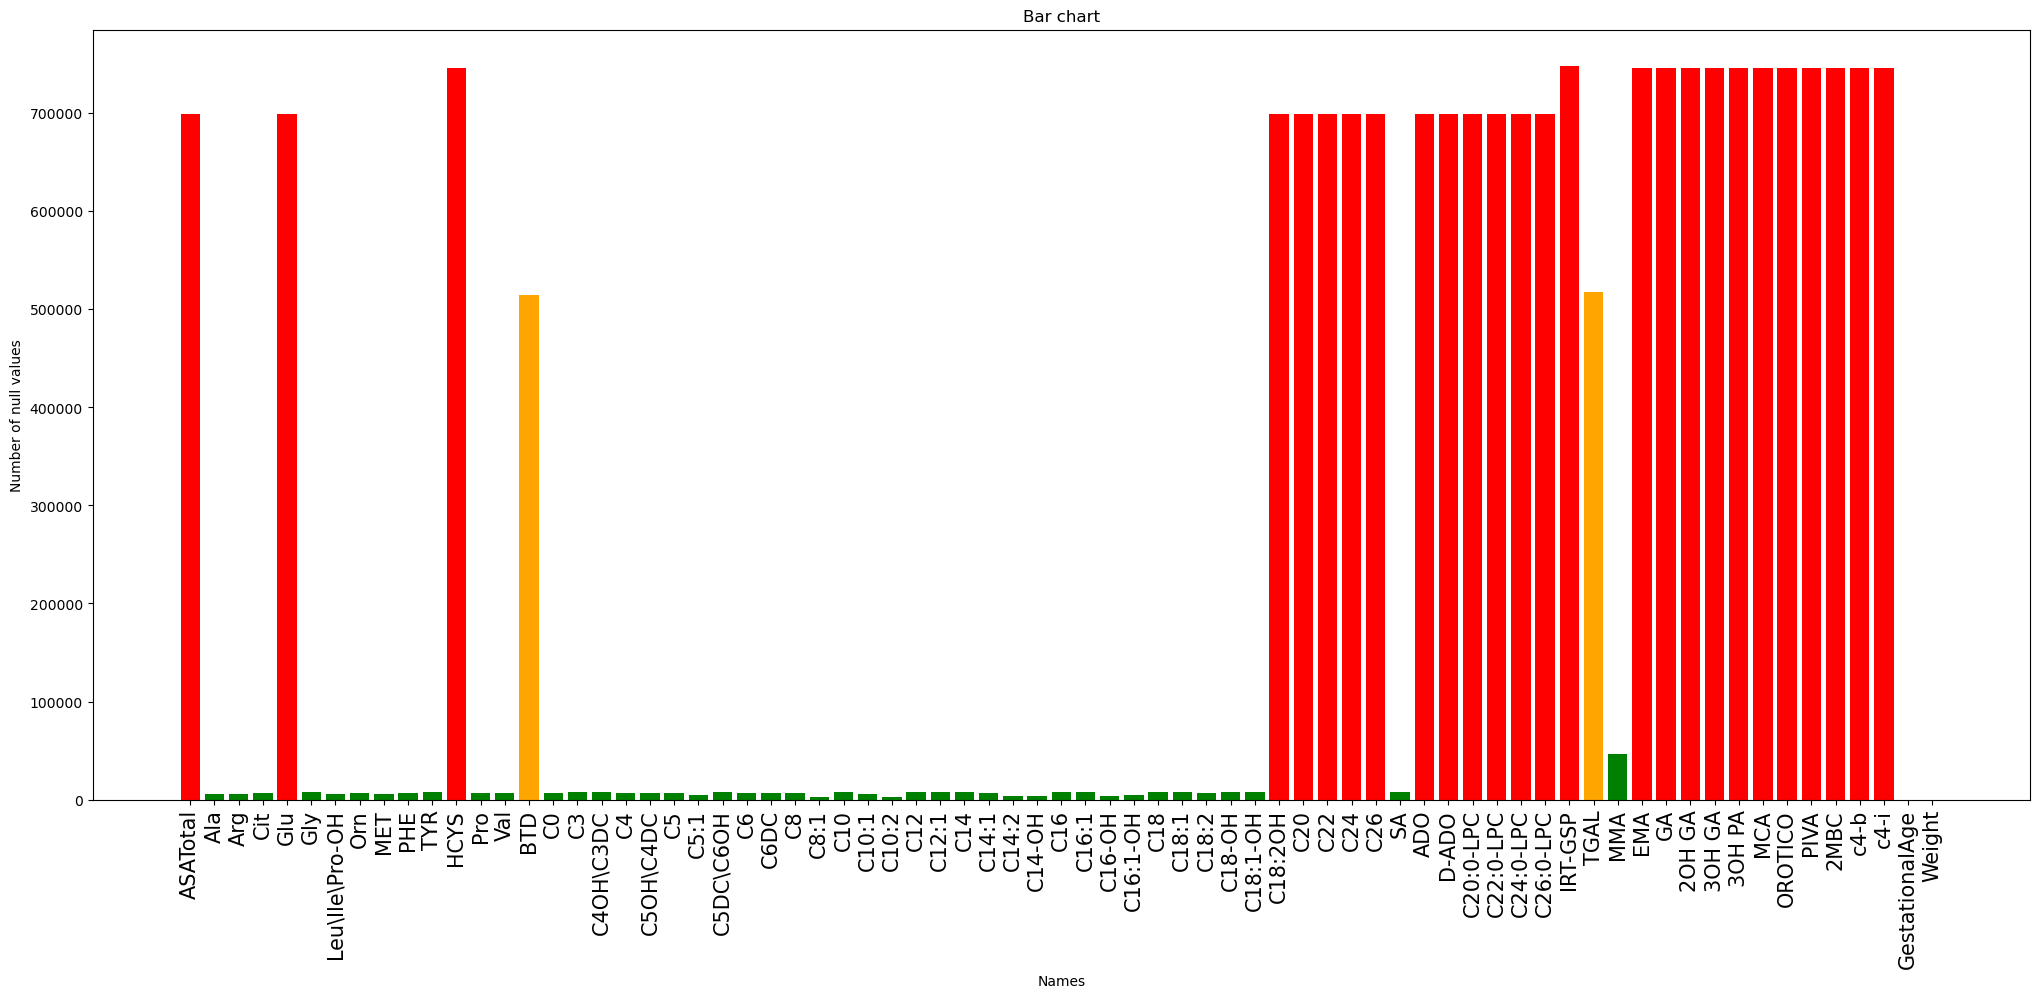

In [268]:
i = 0
x = colonne_numeriche
colors = []
y = []

for val in colonne_numeriche:
    percentage = (babies_def2[val].null_count()/babies_def2.shape[0])*100
    if percentage > 90:
        colors.append('red')
        i = i+1
    elif percentage > 50:
        colors.append('orange')
    else:
        colors.append('green')
    y.append(babies_def2[val].null_count())

plt.figure(figsize=(25, 10))
plt.bar(x, y, color = colors)
plt.xlabel('Names')
plt.ylabel('Number of null values')
plt.title('Bar chart')
plt.xticks(rotation=90, fontsize = 15)

plt.savefig('missing_new2.png')
plt.show()

#### Bambini che pesano meno di 1,5 kg

In [270]:
extra_piccoli = babies_def2.filter(pl.col('Weight') < 1500)

In [272]:
statistics_ppp2 = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp2 = pl.concat([statistics_ppp2, more_stat])
statistics_ppp2 = statistics_ppp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [274]:
statistics_ppp2

shape: (13, 74)
┌────────────┬──────────┬─────────┬────────┬───┬────────┬────────┬────────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala     ┆ Arg    ┆ … ┆ c4-b   ┆ c4-i   ┆ GestationalAge ┆ Weight   │
│ ---        ┆ ---      ┆ ---     ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---            ┆ ---      │
│ str        ┆ f64      ┆ f64     ┆ f64    ┆   ┆ f64    ┆ f64    ┆ f64            ┆ f64      │
╞════════════╪══════════╪═════════╪════════╪═══╪════════╪════════╪════════════════╪══════════╡
│ count      ┆ 363.0    ┆ 5693.0  ┆ 4436.0 ┆ … ┆ 37.0   ┆ 36.0   ┆ 5966.0         ┆ 5966.0   │
│ null_count ┆ 5603.0   ┆ 273.0   ┆ 1530.0 ┆ … ┆ 5929.0 ┆ 5930.0 ┆ 0.0            ┆ 0.0      │
│ mean       ┆ 0.373    ┆ 260.716 ┆ 19.094 ┆ … ┆ 0.316  ┆ 0.253  ┆ 29.775         ┆ 1154.136 │
│ std        ┆ 0.213    ┆ 100.364 ┆ 10.233 ┆ … ┆ 0.471  ┆ 0.12   ┆ 2.905          ┆ 280.631  │
│ min        ┆ 0.092    ┆ 0.0     ┆ 0.0    ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 350.0    │
│ 25%        ┆ 0.247    ┆ 186.48  ┆ 10.36  ┆ … ┆ 0.073  ┆ 0.161  ┆ 28.0           ┆ 956.0    │
│ 50%        ┆ 0.321    ┆ 243.13  ┆ 18.32  ┆ … ┆ 0.135  ┆ 0.244  ┆ 30.0           ┆ 1210.0   │
│ 75%        ┆ 0.448    ┆ 321.52  ┆ 27.19  ┆ … ┆ 0.301  ┆ 0.343  ┆ 32.0           ┆ 1400.0   │
│ max        ┆ 2.514    ┆ 552.97  ┆ 50.27  ┆ … ┆ 2.28   ┆ 0.506  ┆ 41.0           ┆ 1499.0   │
│ 99%        ┆ 1.12     ┆ 529.048 ┆ 39.29  ┆ … ┆ 2.28   ┆ 0.506  ┆ 36.0           ┆ 1495.0   │
│ 1%         ┆ 0.124    ┆ 91.14   ┆ 2.16   ┆ … ┆ 0.031  ┆ 0.052  ┆ 23.0           ┆ 460.0    │
│ Kurtosis   ┆ 29.796   ┆ -0.062  ┆ -1.006 ┆ … ┆ 7.146  ┆ -1.02  ┆ -0.012         ┆ -0.579   │
│ Skewness   ┆ 3.894    ┆ 0.661   ┆ 0.216  ┆ … ┆ 2.684  ┆ 0.205  ┆ -0.008         ┆ -0.637   │
└────────────┴──────────┴─────────┴────────┴───┴────────┴────────┴────────────────┴──────────┘

In [276]:
header = statistics_ppp2["statistic"].to_list()

prova = statistics_ppp2.transpose(include_header=True)

prova.columns = ['Name'] + header
prova[1:]

prova_bis = prova['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [278]:
statistics_ppp2_pandas = prova_bis.to_pandas()

# Esporta come tabella LaTeX
statistiche_1500 = statistics_ppp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("extra_piccoli.tex", "w") as f:
    f.write(statistiche_1500)

In [290]:
len(colonne_numeriche)

73

IndexError: index 15 is out of bounds for axis 0 with size 15

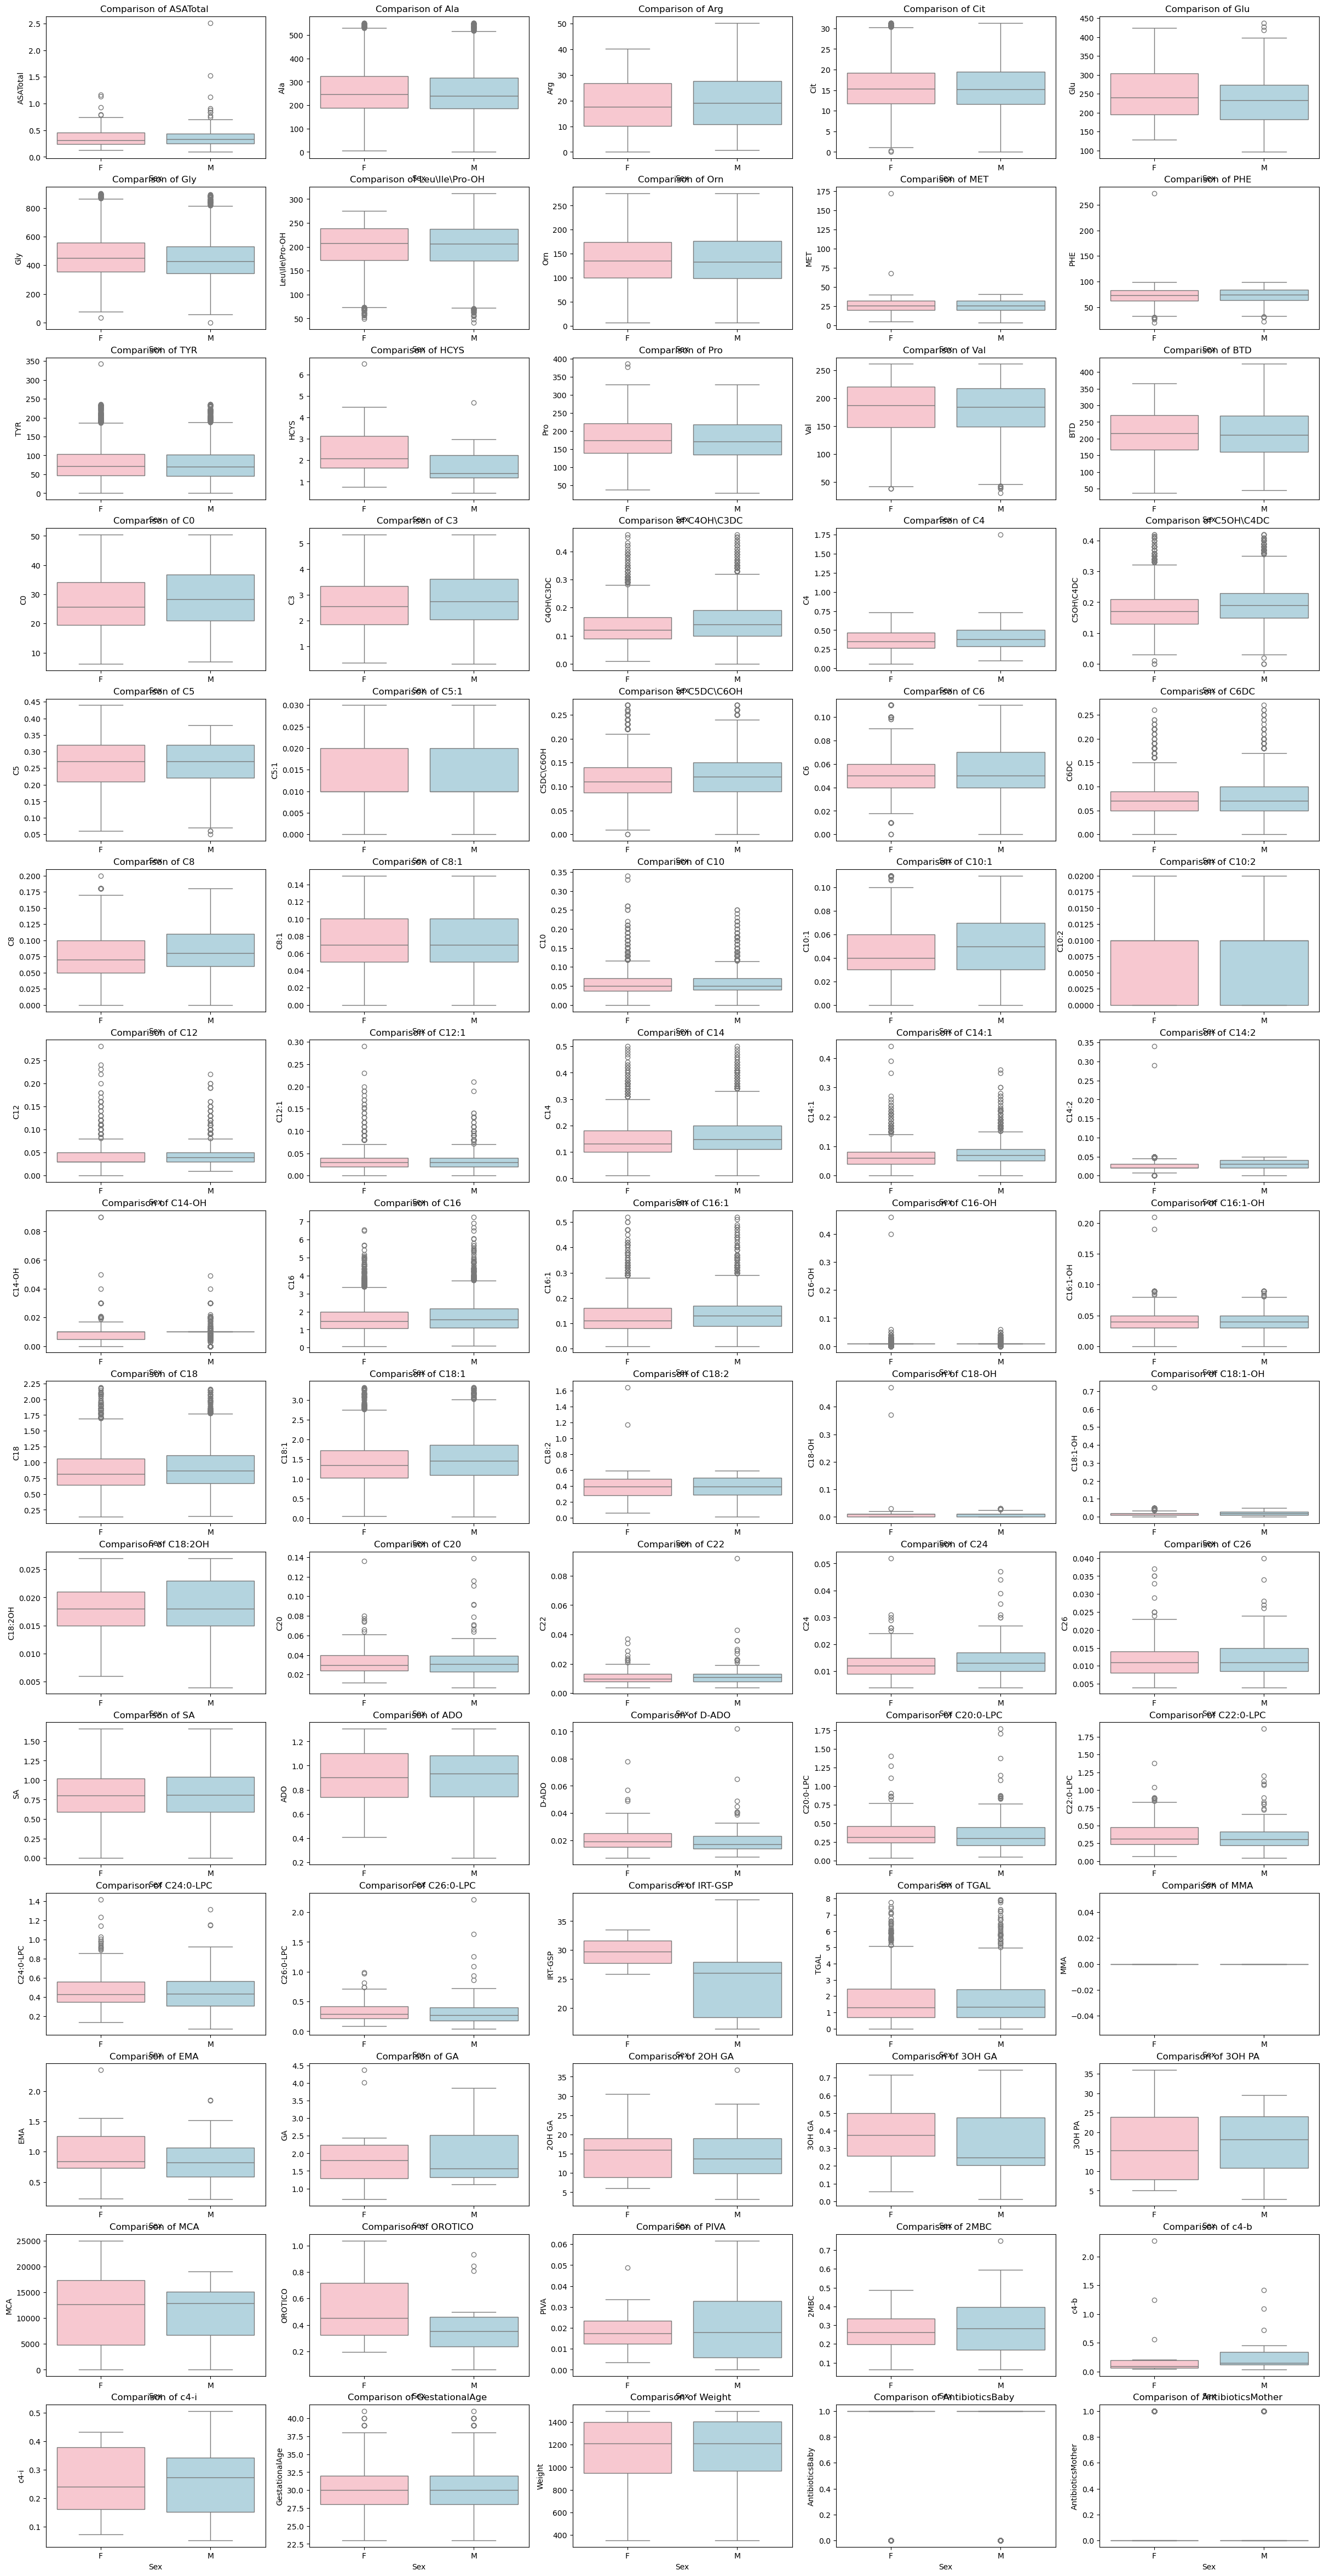

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che `extra_piccoli` sia un dataframe Polars
# Convertilo in un dataframe Pandas
extra_piccoli_pandas = extra_piccoli.to_pandas()

# Creazione dei subplot
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

i, j = 0, 0  # Assicurati di inizializzare `i` e `j` correttamente per indicizzare gli assi
for col in extra_piccoli_pandas.select_dtypes(include='number').columns: 
    sns.boxplot(
        x='Sex', 
        y=col, 
        ax=axes[i, j], 
        data=extra_piccoli_pandas, 
        hue='Sex', 
        palette={'M': 'lightblue', 'F': 'pink'}
    )  
    axes[i, j].set_title(f'Comparison of {col} ')
    j += 1
    if j == 5:  # Passa alla riga successiva
        i += 1
        j = 0

plt.tight_layout()
plt.savefig('Extrapiccoli.png')
plt.show()


#### Bambini che pesano tra 2 e 1,5 kg

In [296]:
piccoli_pic = babies_def2.filter((pl.col('Weight') >= 1500) & (pl.col('Weight') < 2000))

In [298]:
statistics_pp2 = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp2 = pl.concat([statistics_pp2, more_stat])
statistics_pp2 = statistics_pp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [300]:
header = statistics_pp2["statistic"].to_list()

prova2 = statistics_pp2.transpose(include_header=True)

prova2.columns = ['Name'] + header
prova2[1:]
unoemezzodue = prova2['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [302]:
statistics_pp2_pandas = unoemezzodue.to_pandas()

# Esporta come tabella LaTeX
statistiche_2000 = statistics_pp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("unoemezzodue_table.tex", "w") as f:
    f.write(statistiche_2000)

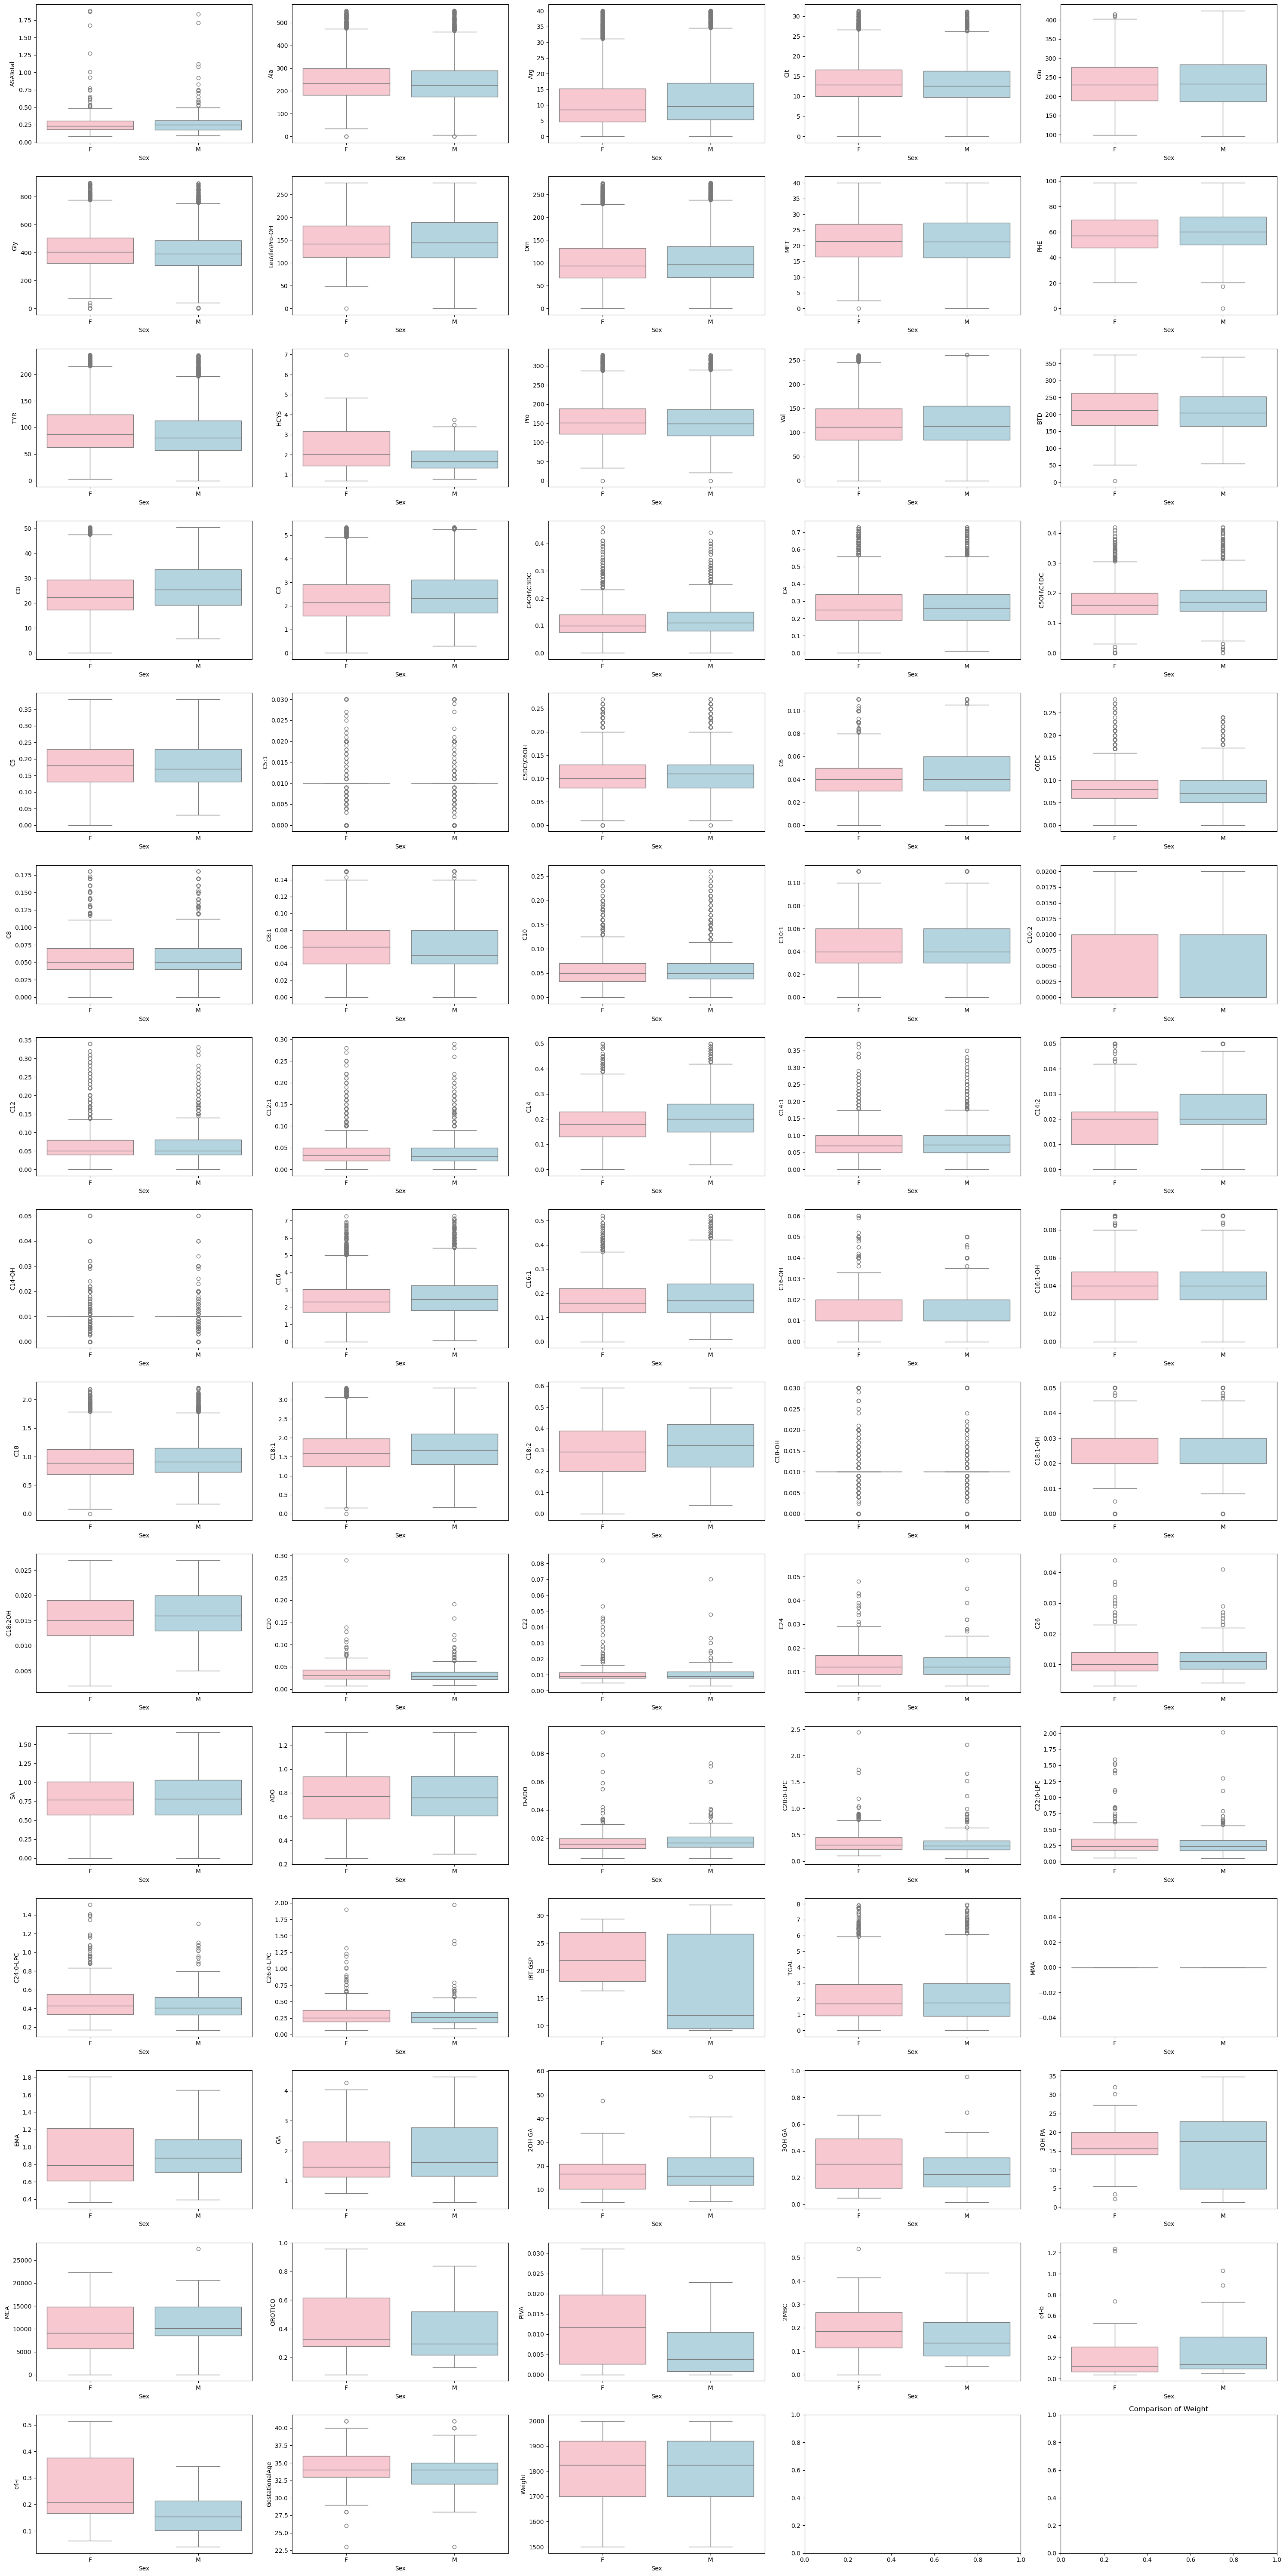

In [309]:
j = 0
i = 0
piccoli_pic = piccoli_pic.to_pandas()

fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in piccoli_pic[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli_pic, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Comparison of {col}')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccoli.png')
plt.tight_layout()

####  Bambini che pesano tra 2 kg di 2,5 kg

In [314]:
piccoli = babies_def2.filter((pl.col('Weight') <= 2500) & (pl.col('Weight') > 2000))

In [316]:
statistics_p2 = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p2 = pl.concat([statistics_p2, more_stat])
statistics_p2 = statistics_p2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_p2

shape: (13, 74)
┌────────────┬──────────┬─────────┬─────────┬───┬─────────┬─────────┬────────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala     ┆ Arg     ┆ … ┆ c4-b    ┆ c4-i    ┆ GestationalAge ┆ Weight   │
│ ---        ┆ ---      ┆ ---     ┆ ---     ┆   ┆ ---     ┆ ---     ┆ ---            ┆ ---      │
│ str        ┆ f64      ┆ f64     ┆ f64     ┆   ┆ f64     ┆ f64     ┆ f64            ┆ f64      │
╞════════════╪══════════╪═════════╪═════════╪═══╪═════════╪═════════╪════════════════╪══════════╡
│ count      ┆ 2378.0   ┆ 36406.0 ┆ 36307.0 ┆ … ┆ 161.0   ┆ 160.0   ┆ 36733.0        ┆ 36733.0  │
│ null_count ┆ 34355.0  ┆ 327.0   ┆ 426.0   ┆ … ┆ 36572.0 ┆ 36573.0 ┆ 0.0            ┆ 0.0      │
│ mean       ┆ 0.269    ┆ 253.502 ┆ 9.48    ┆ … ┆ 0.163   ┆ 0.148   ┆ 36.489         ┆ 2314.838 │
│ std        ┆ 0.179    ┆ 81.896  ┆ 6.868   ┆ … ┆ 0.2     ┆ 0.079   ┆ 1.764          ┆ 137.542  │
│ min        ┆ 0.05     ┆ 0.0     ┆ 0.0     ┆ … ┆ 0.021   ┆ 0.007   ┆ 25.0           ┆ 2001.0   │
│ 25%        ┆ 0.175    ┆ 194.8   ┆ 4.45    ┆ … ┆ 0.064   ┆ 0.095   ┆ 35.0           ┆ 2210.0   │
│ 50%        ┆ 0.232    ┆ 242.13  ┆ 7.71    ┆ … ┆ 0.097   ┆ 0.134   ┆ 37.0           ┆ 2340.0   │
│ 75%        ┆ 0.306    ┆ 300.57  ┆ 12.57   ┆ … ┆ 0.156   ┆ 0.179   ┆ 38.0           ┆ 2434.0   │
│ max        ┆ 2.692    ┆ 553.42  ┆ 39.93   ┆ … ┆ 1.208   ┆ 0.563   ┆ 42.0           ┆ 2500.0   │
│ 99%        ┆ 1.115    ┆ 491.09  ┆ 33.11   ┆ … ┆ 0.972   ┆ 0.376   ┆ 40.0           ┆ 2500.0   │
│ 1%         ┆ 0.091    ┆ 108.04  ┆ 0.99    ┆ … ┆ 0.027   ┆ 0.032   ┆ 32.0           ┆ 2020.0   │
│ Kurtosis   ┆ 35.592   ┆ 0.533   ┆ 2.164   ┆ … ┆ 9.608   ┆ 4.763   ┆ -0.114         ┆ -0.852   │
│ Skewness   ┆ 4.665    ┆ 0.714   ┆ 1.407   ┆ … ┆ 3.03    ┆ 1.62    ┆ -0.224         ┆ -0.501   │
└────────────┴──────────┴─────────┴─────────┴───┴─────────┴─────────┴────────────────┴──────────┘

In [318]:
header = statistics_p2["statistic"].to_list()

prova3 = statistics_p2.transpose(include_header=True)

prova3.columns = ['Name'] + header
prova3[1:]

duemezzo = prova3['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [320]:
statistics_p2_pandas = duemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_2500 = statistics_p2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("duemezzo_table.tex", "w") as f:
    f.write(statistiche_2500)

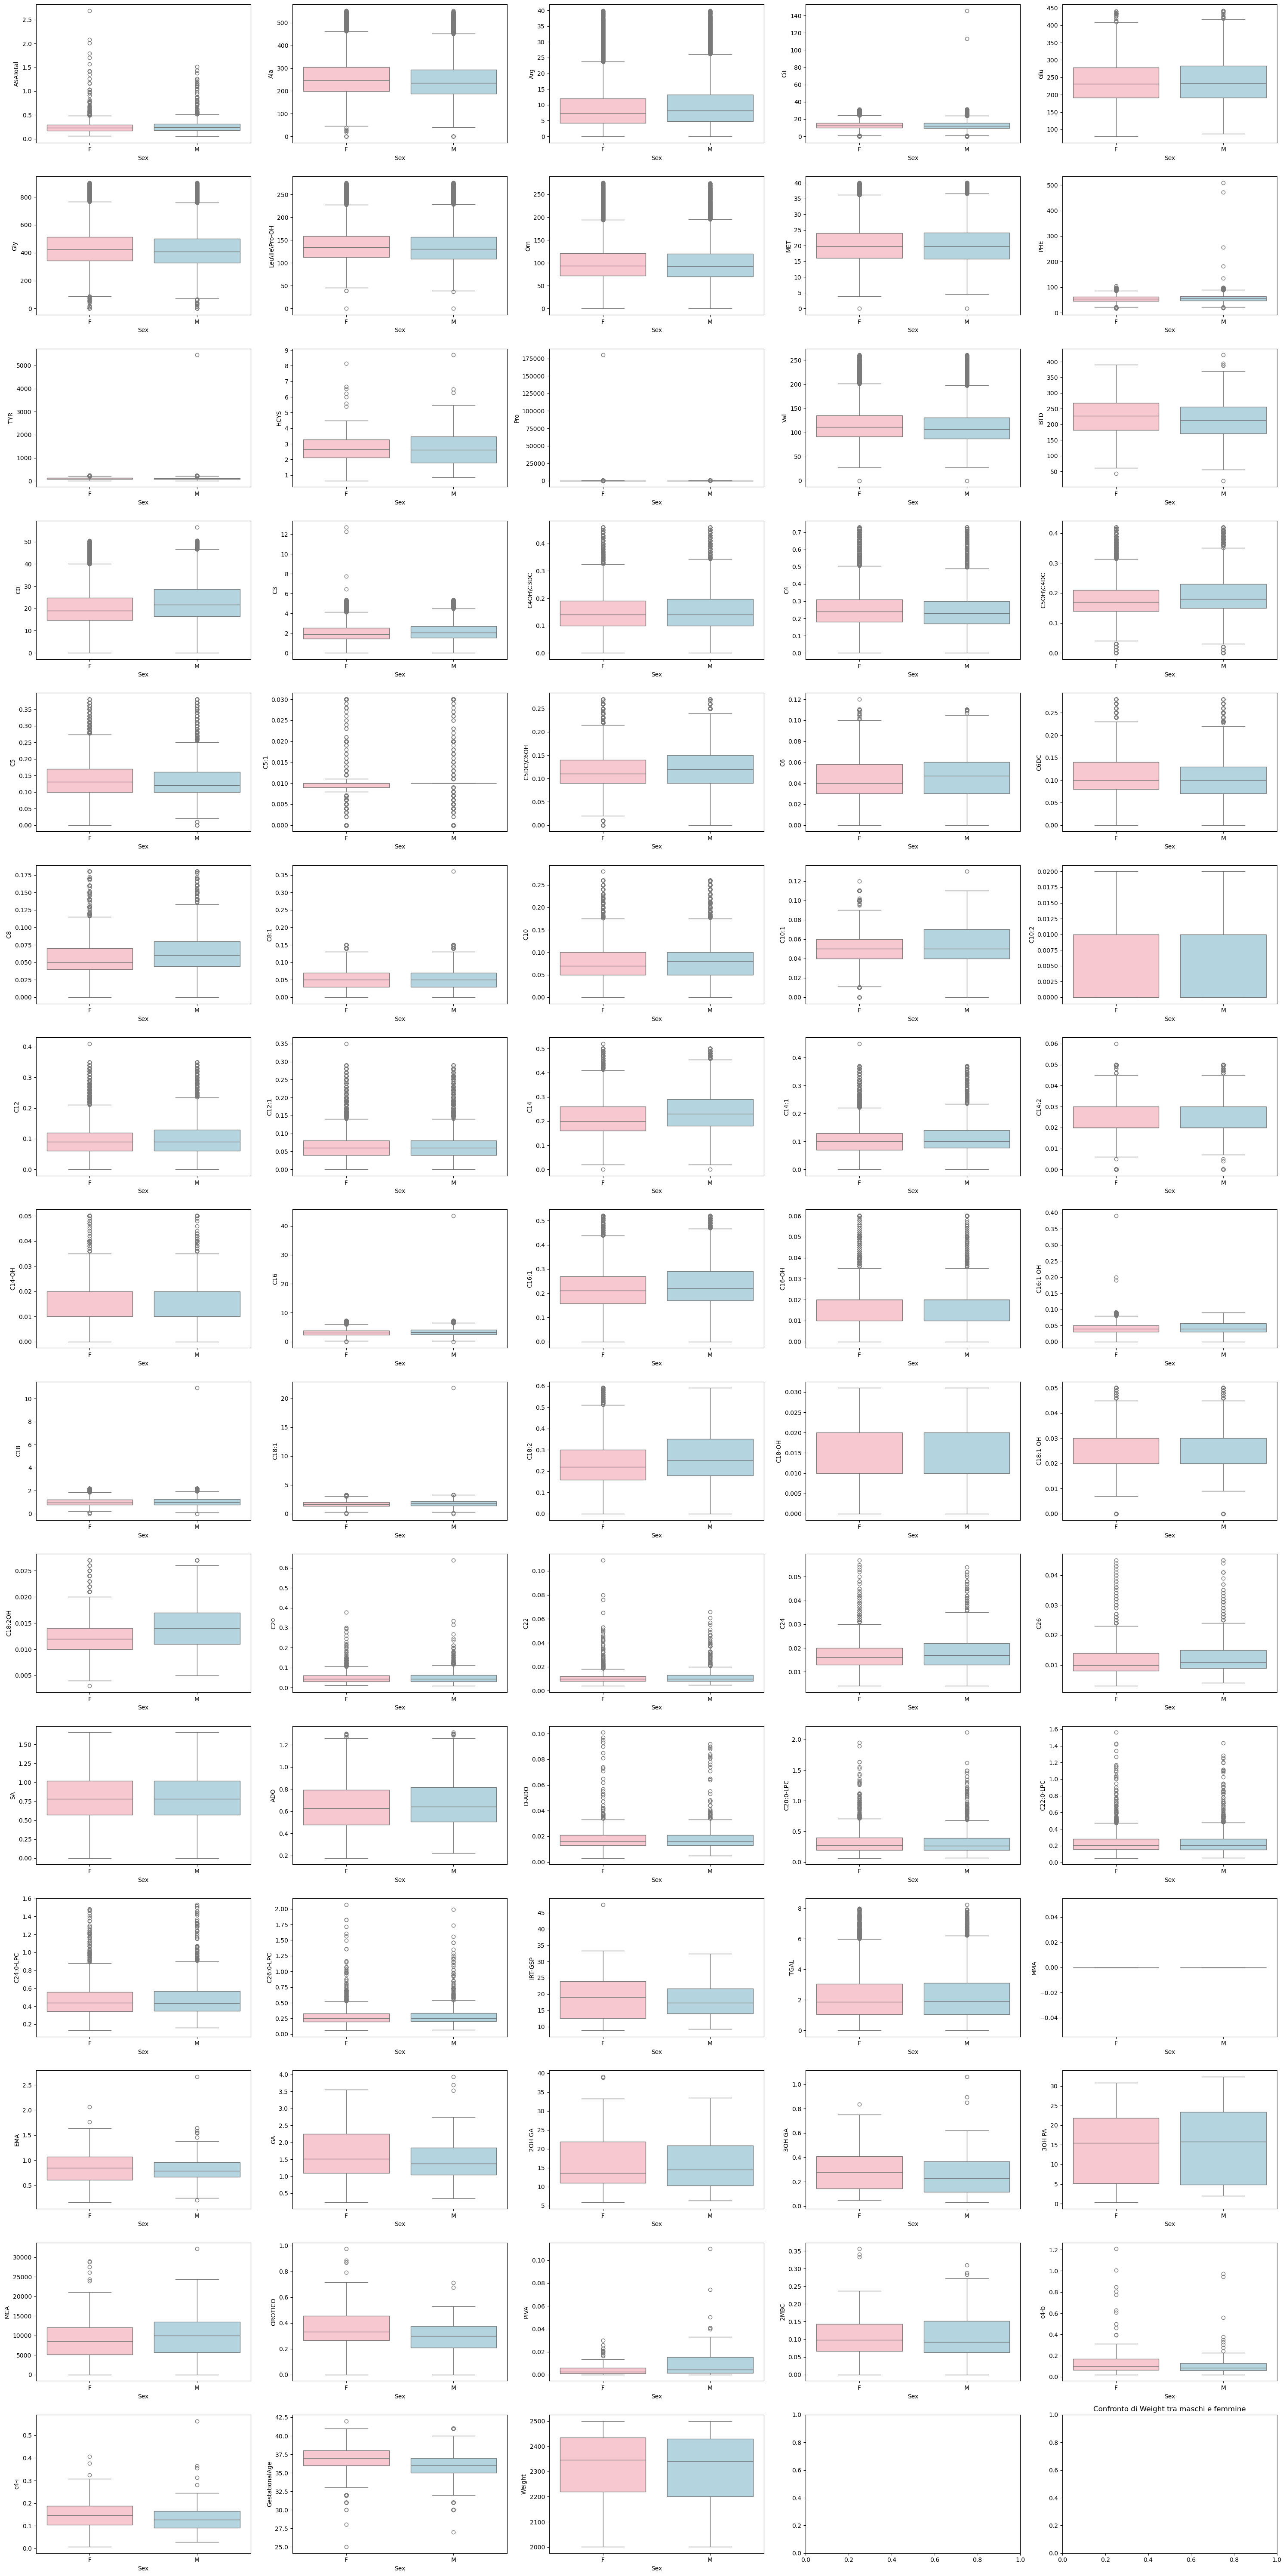

In [322]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

piccoli = piccoli.to_pandas()

for col in piccoli[colonne_numeriche].columns: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_medi.png')
plt.tight_layout()

### Babies over 2,5kg 

In [325]:
ciccioni = babies_def2.filter(pl.col('Weight') > 2500)

In [327]:
statistics_c2 = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c2 = pl.concat([statistics_c2, more_stat])
statistics_c2 = statistics_c2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_c2

shape: (13, 74)
┌────────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬─────────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg      ┆ … ┆ c4-b     ┆ c4-i     ┆ Gestational ┆ Weight   │
│ ---        ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ Age         ┆ ---      │
│ str        ┆ f64      ┆ f64        ┆ f64      ┆   ┆ f64      ┆ f64      ┆ ---         ┆ f64      │
│            ┆          ┆            ┆          ┆   ┆          ┆          ┆ f64         ┆          │
╞════════════╪══════════╪════════════╪══════════╪═══╪══════════╪══════════╪═════════════╪══════════╡
│ count      ┆ 46613.0  ┆ 691104.0   ┆ 693357.0 ┆ … ┆ 2559.0   ┆ 2534.0   ┆ 696427.0    ┆ 696427.0 │
│ null_count ┆ 649814.0 ┆ 5323.0     ┆ 3070.0   ┆ … ┆ 693868.0 ┆ 693893.0 ┆ 0.0         ┆ 0.0      │
│ mean       ┆ 0.287    ┆ 259.661    ┆ 9.555    ┆ … ┆ 0.184    ┆ 0.135    ┆ 39.115      ┆ 3320.071 │
│ std        ┆ 0.175    ┆ 496.518    ┆ 6.743    ┆ … ┆ 0.239    ┆ 0.086    ┆ 1.285       ┆ 401.649  │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0      ┆ … ┆ 0.0      ┆ 0.0      ┆ 23.0        ┆ 2502.0   │
│ 25%        ┆ 0.188    ┆ 205.38     ┆ 4.75     ┆ … ┆ 0.062    ┆ 0.081    ┆ 38.0        ┆ 3030.0   │
│ 50%        ┆ 0.249    ┆ 247.7      ┆ 8.04     ┆ … ┆ 0.097    ┆ 0.116    ┆ 39.0        ┆ 3300.0   │
│ 75%        ┆ 0.333    ┆ 300.62     ┆ 12.75    ┆ … ┆ 0.175    ┆ 0.167    ┆ 40.0        ┆ 3585.0   │
│ max        ┆ 2.957    ┆ 324236.445 ┆ 1516.685 ┆ … ┆ 2.433    ┆ 0.733    ┆ 43.0        ┆ 5000.0   │
│ 99%        ┆ 1.026    ┆ 484.594    ┆ 31.09    ┆ … ┆ 1.127    ┆ 0.449    ┆ 41.0        ┆ 4340.0   │
│ 1%         ┆ 0.095    ┆ 126.62     ┆ 0.99     ┆ … ┆ 0.014    ┆ 0.017    ┆ 36.0        ┆ 2550.0   │
│ Kurtosis   ┆ 26.83    ┆ 352302.357 ┆ 3599.74  ┆ … ┆ 13.324   ┆ 7.54     ┆ 0.713       ┆ -0.067   │
│ Skewness   ┆ 3.877    ┆ 582.221    ┆ 17.26    ┆ … ┆ 3.173    ┆ 2.12     ┆ -0.561      ┆ 0.35     │
└────────────┴──────────┴────────────┴──────────┴───┴──────────┴──────────┴─────────────┴──────────┘